<a href="https://colab.research.google.com/github/TBridge1/spotify-wrapped/blob/main/SpotifyWrapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spotify Wrapped


This IPYNB file aims to take a person's extended spotify streaming history which can be obtained by following these [instructions](https://support.stats.fm/docs/import/spotify-import/). It will also use the Spotify Developer API so a person will need to generate their own client_id and client_secret which can be obtained by following these [steps](https://developer.spotify.com/documentation/web-api/tutorials/getting-started). Upon setting up the API, the secret keys will need to be put in an env file, stored as a variable if not sharing or by using the secrets tab on Google CoLab, which has been done in this example.

A few variables may have to be changed such as 'name' for different people and tweaking the amount of data used in some API calls based on the amount and variation of data.

The main focus of the program is to analyse and organise a persons music listening habits based on their own data combined with additional information from the Spotify API. The information is mostly all present in the file but all combined in a meaningful and coherent way inside the PowerPoint file created at the end.

#Installs

Ensure the librarys for Spotify API, Images and Powerpoint are installed before beginning. Additional libraries such as numpy, pandas, matplotlib and seaborn may have to be installed on a given environment.

In [ ]:
!pip install spotipy
!pip install pillow
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 18.5 MB/s eta 0:00:00


#Imports

In [ ]:
import base64
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy
import urllib.request

from datetime import datetime
from PIL import Image
from requests import get, post
from google.colab import drive, userdata
from matplotlib.colors import LinearSegmentedColormap
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.util import Pt, Inches

#Link to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Set Name and Threshold

Change the name to desired person and threshold will determine top x tracks, artists, albums for graphing purposes. 50 reccommended as it looks good while retaining sufficient information

In [ ]:
#'Thomas' #'Richard', 'Peter'
name = 'Thomas'
threshold = 50

#Graph Set-Up

Setting background colour, font and various text colours based on the Spotify green, white and black hex values.

In [ ]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Liberation Sans'
spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#ffffff'

Creates a colour map of the spotify colours along with some additional colours that go with the spotify colours or have been used by spotify themselves in the past.

In [ ]:
# list of colours in rgb
rgb_values = [
    (29, 185, 84),
    (83, 83, 83),
    (179, 179, 179),
    (98,208,137),
    (225,236,227),
    (69,126,89),
    (168,178,168),
    (44,121,114),
    (174,201,147),
    (74,199,118),
    (255, 255, 255),
    (46,64,69),
    (62,61,84)
]

# Convert to RGB tuples values between 0 and 1
spotify_colors = [(r / 255, g / 255, b / 255) for r, g, b in rgb_values]

# place colours in position on linear segmented colour map
positions = [i / (len(spotify_colors) - 1) for i in range(len(spotify_colors))]

#create the colour map
spotify_cmap = LinearSegmentedColormap.from_list('spotify_cmap', list(zip(positions, spotify_colors)))

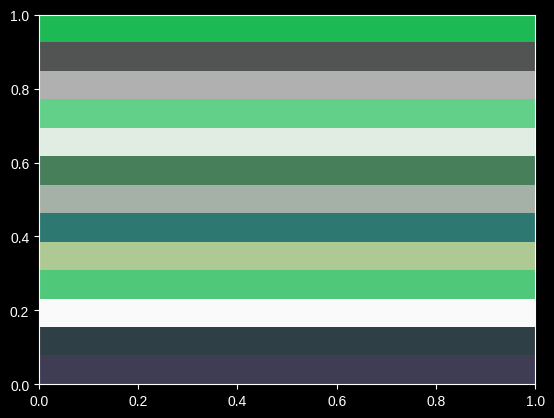

In [ ]:
#show the colour map
plt.imshow([[i] for i in range(len(spotify_colors))], cmap=spotify_cmap, aspect='auto', extent=[0, 1, 0, 1])

#Read Files and Convert to DataFrame

All the files are in the same folder and have been renamed by hand. Selecting the name earlier will define which files are used. Defaults to Thomas if no name chosen.

In [ ]:
if name == 'Thomas':
  files = ["2016-2018_0", "2018-2019_1", "2019-2021_2", "2021-2022_3", "2022-2023_4"]
elif name == 'Richard':
  files = ["2018-2023_0_Richard", "2023-2024_1_Richard", "2024_2_Richard"]
elif name == 'Peter':
  files = ["2017-2019_0_Peter", "2019-2020_1_Peter", "2020_2_Peter", "2020-2021_3_Peter",
  "2021_4_Peter", "2021-2022_5_Peter", "2022_6_Peter", "2022-2023_7_Peter",
  "2023_8_Peter", "2023-2024_9_Peter", "2024_10_Peter"]
else:
  files = ["2016-2018_0", "2018-2019_1", "2019-2021_2", "2021-2022_3", "2022-2023_4"]

##File Reading

Reads in JSON files, converts to dfs combines together into one df.

In [ ]:
df = pd.DataFrame()
all_data = {}

# loops files
for i in files:

  # opens specified file as a json
  with open(f'/content/drive/MyDrive/Spotify Extended Streaming History/Streaming_History_Audio_{i}.json') as json_file:
      # loads the json
      data = json.load(json_file)

  # creates a temporary df from normalised json
  tdf = pd.json_normalize(data)

  # combines or concats with inital df
  df = pd.concat([df, tdf])

#Inital Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70765 entries, 0 to 11441
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 70765 non-null  object
 1   username                           70765 non-null  object
 2   platform                           70765 non-null  object
 3   ms_played                          70765 non-null  int64 
 4   conn_country                       70765 non-null  object
 5   ip_addr_decrypted                  64004 non-null  object
 6   user_agent_decrypted               63566 non-null  object
 7   master_metadata_track_name         69842 non-null  object
 8   master_metadata_album_artist_name  69842 non-null  object
 9   master_metadata_album_album_name   69842 non-null  object
 10  spotify_track_uri                  69842 non-null  object
 11  episode_name                       717 non-null    object
 12  episode_s

Reading the data in you can see that there is already a disparity in parts of the data. This is because it tracks both podcasts and music streams. This project has no interest in podcasts so it will be rid of. There are a few other columns that are of no use like incognito mode etc. After that there are a few null values in the data early on as a column like reason end and skipped was not recorded by Spotify from the start so these values will be replaced with unknown and the remaining nulls can be dropped as they relate to podcasts and not music streams.

In [ ]:
df

ts     username  \
0      2016-09-23T20:45:46Z  tmbridgeman   
1      2016-09-23T20:48:46Z  tmbridgeman   
2      2016-09-23T20:49:12Z  tmbridgeman   
3      2016-09-23T20:49:58Z  tmbridgeman   
4      2016-09-23T20:52:33Z  tmbridgeman   
...                     ...          ...   
11437  2023-12-06T15:47:10Z  tmbridgeman   
11438  2023-12-06T15:47:17Z  tmbridgeman   
11439  2023-12-06T15:50:33Z  tmbridgeman   
11440  2023-12-06T15:53:15Z  tmbridgeman   
11441  2023-12-06T16:46:13Z  tmbridgeman   

                                           platform  ms_played conn_country  \
0      Android OS 5.1.1 API 22 (OnePlus, ONE E1003)      37300           IE   
1      Android OS 5.1.1 API 22 (OnePlus, ONE E1003)     179791           IE   
2      Android OS 5.1.1 API 22 (OnePlus, ONE E1003)      25578           IE   
3      Android OS 5.1.1 API 22 (OnePlus, ONE E1003)      44920           IE   
4      Android OS 5.1.1 API 22 (OnePlus, ONE E1003)     154984           IE   
...                                             ...        ...          ...   
11437                                       windows       1600           IE   
11438                                       windows       6870           IE   
11439                                       windows     200590           IE   
11440                                       windows     169790           IE   
11441                                       windows     131830           IE   

      ip_addr_decrypted user_agent_decrypted  \
0         95.44.250.111              unknown   
1         95.44.250.111              unknown   
2         95.44.250.111              unknown   
3         95.44.250.111              unknown   
4         95.44.250.111              unknown   
...                 ...                  ...   
11437    109.76.236.111              unknown   
11438    109.76.236.111              unknown   
11439    109.76.236.111              unknown   
11440    109.76.236.111              unknown   
11441    109.76.236.111              unknown   

                              master_metadata_track_name  \
0                                       Hopes and Dreams   
1                                          The Evil King   
2      Ready Set Go (feat. Capital Kings) (feat. Capi...   
3                                      Supernova Sunrise   
4              VIP (feat. Manwell Reyes of Group 1 Crew)   
...                                                  ...   
11437                                            Flowers   
11438                                               None   
11439                                           The Fall   
11440                                          Chemicals   
11441                                          Amsterdam   

      master_metadata_album_artist_name master_metadata_album_album_name  ...  \
0                     NateWantsToBattle                         Bad Time  ...   
1                     NateWantsToBattle                    Songs of Time  ...   
2                          Royal Tailor                     Royal Tailor  ...   
3                            We Are Leo                      Hello Again  ...   
4                           Manic Drive                              VIP  ...   
...                                 ...                              ...  ...   
11437                       Miley Cyrus          Endless Summer Vacation  ...   
11438                              None                             None  ...   
11439               Gregory Alan Isakov                  Appaloosa Bones  ...   
11440               Gregory Alan Isakov                 Evening Machines  ...   
11441               Gregory Alan Isakov                   The Weatherman  ...   

      episode_name episode_show_name spotify_episode_uri reason_start  \
0             None              None                None     clickrow   
1             None              None                None     clickrow   
2             None              None                None 

Example of uncleaned df, lots of unncessary information present

#Cleaning

Specify columns to keep, fill blanks of certain columns, drop remaining null values.

In [ ]:
df = df[['ts', 'platform', 'ms_played', 'conn_country','master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri','reason_start',
       'reason_end', 'shuffle', 'skipped']]

df["skipped"]= df["skipped"].fillna("unknown")
df["reason_end"]= df["reason_end"].fillna("unknown")

df = df.dropna()

<ipython-input-100-3acca78ffa81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["skipped"]= df["skipped"].fillna("unknown")
<ipython-input-100-3acca78ffa81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reason_end"]= df["reason_end"].fillna("unknown")


Checking the info again shows that there is still almost 70,000 data points for 'Thomas' just shrank down to 11 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69842 entries, 0 to 11441
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 69842 non-null  object
 1   platform                           69842 non-null  object
 2   ms_played                          69842 non-null  int64 
 3   conn_country                       69842 non-null  object
 4   master_metadata_track_name         69842 non-null  object
 5   master_metadata_album_artist_name  69842 non-null  object
 6   master_metadata_album_album_name   69842 non-null  object
 7   spotify_track_uri                  69842 non-null  object
 8   reason_start                       69842 non-null  object
 9   reason_end                         69842 non-null  object
 10  shuffle                            69842 non-null  bool  
 11  skipped                            69842 non-null  object
dtypes: bool(1

Adding an additional column for date based on the ts timestamp

In [ ]:
def extract_date(date_string):
  # return the formatted date without time
  return datetime.fromisoformat(date_string.replace('Z', '+00:00')).date()
df['date'] = df['ts'].apply(extract_date)

In [ ]:
df

ts                                      platform  \
0      2016-09-23T20:45:46Z  Android OS 5.1.1 API 22 (OnePlus, ONE E1003)   
1      2016-09-23T20:48:46Z  Android OS 5.1.1 API 22 (OnePlus, ONE E1003)   
2      2016-09-23T20:49:12Z  Android OS 5.1.1 API 22 (OnePlus, ONE E1003)   
3      2016-09-23T20:49:58Z  Android OS 5.1.1 API 22 (OnePlus, ONE E1003)   
4      2016-09-23T20:52:33Z  Android OS 5.1.1 API 22 (OnePlus, ONE E1003)   
...                     ...                                           ...   
11436  2023-12-06T15:47:07Z                                       windows   
11437  2023-12-06T15:47:10Z                                       windows   
11439  2023-12-06T15:50:33Z                                       windows   
11440  2023-12-06T15:53:15Z                                       windows   
11441  2023-12-06T16:46:13Z                                       windows   

       ms_played conn_country  \
0          37300           IE   
1         179791           IE   
2          25578           IE   
3          44920           IE   
4         154984           IE   
...          ...          ...   
11436       1470           IE   
11437       1600           IE   
11439     200590           IE   
11440     169790           IE   
11441     131830           IE   

                              master_metadata_track_name  \
0                                       Hopes and Dreams   
1                                          The Evil King   
2      Ready Set Go (feat. Capital Kings) (feat. Capi...   
3                                      Supernova Sunrise   
4              VIP (feat. Manwell Reyes of Group 1 Crew)   
...                                                  ...   
11436                                        Eyes Closed   
11437                                            Flowers   
11439                                           The Fall   
11440                                          Chemicals   
11441                                          Amsterdam   

      master_metadata_album_artist_name master_metadata_album_album_name  \
0                     NateWantsToBattle                         Bad Time   
1                     NateWantsToBattle                    Songs of Time   
2                          Royal Tailor                     Royal Tailor   
3                            We Are Leo                      Hello Again   
4                           Manic Drive                              VIP   
...                                 ...                              ...   
11436                        Ed Sheeran                                -   
11437                       Miley Cyrus          Endless Summer Vacation   
11439               Gregory Alan Isakov                  Appaloosa Bones   
11440               Gregory Alan Isakov                 Evening Machines   
11441               Gregory Alan Isakov                   The Weatherman   

                          spotify_track_uri reason_start  \
0      spotify:track:7AkIiDfDy7lMp4Z5E55oXc     clickrow   
1      spotify:track:4n0Mi3ysld7y19pJOEYCQ1     clickrow   
2      spotify:track:0HbjDc4BM2kXEuiOGf8nPl     clickrow   
3      spotify:track:5nTqUhWqkA1nRy8OUOkZyX     clickrow   
4      spotify:track:1Eu8TaJ8xyP63VtsBOYdi1     clickrow   
...                                     ...          ...   
11436  spotify:track:3p7XQpdt8Dr6oMXSvRZ9bg       fwdbtn   
11437  spotify:track:7DSAEUvxU8FajXtRloy8M0       fwdbtn   
11439  spotify:track:0sR4cNJtdgLDFIK9iMWw5W    trackdone   
11440  spotify:track:6Eyt039etvBOx2V612yu4y    trackdone   
11441  spotify:track:7iQmjnDXYngWGsbjVnDc1U    trackdone   

                         reason_end  shuffle  skipped        date  
0                           endplay     True  unknown  2016-09-23  
1                           endplay     True  unknown  2016-09-23  
2                           endplay    False  unknown  2016-09-23  
3                           endplay    False  unknown  2016-09-23  
4       

The dataframe that will be used going forward.

#Information Extraction

##Total Streams

In [ ]:
total_streams = df.shape[0]
total_streams

69842

Extracts the total streams by getting the shape of the df and highlighting the rows

##Time

Function below is for the conversion of milliseconds up to days

In [ ]:
def convert_milliseconds(milliseconds):
  seconds, smilliseconds = divmod(milliseconds, 1000)
  minutes, mseconds = divmod(seconds, 60)
  hours, hminutes = divmod(minutes, 60)
  days, dhours = divmod(hours, 24)
  return days, dhours, hours, hminutes, minutes, mseconds, seconds, smilliseconds

In [ ]:
total_playtime = df['ms_played'].sum()
total_playtime = convert_milliseconds(total_playtime)
print(f'{total_playtime[0]} days and {total_playtime[1]} hours')
print(f'{total_playtime[2]} hours and {total_playtime[3]} minutes')
print(f'{total_playtime[4]} minutes and {total_playtime[5]} seconds')
print(f'{total_playtime[6]} seconds and {total_playtime[7]} milliseconds')

125 days and 3 hours
3003 hours and 54 minutes
180234 minutes and 41 seconds
10814081 seconds and 872 milliseconds


A persons total listentime in various formats

###Average Streams a day

In [ ]:
# sum of each day by the length of days spotify has been played
# does not consider days spotify was not played
average_streams = df['date'].value_counts().sum() // len(df['date'].value_counts())
print(f'An average of {average_streams} streams per day ')

An average of 35 streams per day 


###Most streamed day

In [ ]:
most_streamed_day = df['date'].value_counts().index[0]
# creates a df where date is the most common date
most_streamed_day_df = df[df['date'] == most_streamed_day]
# gets sum
most_streams_time = most_streamed_day_df['ms_played'].sum()
# converts milliseconds etc
most_streams_time_mins = convert_milliseconds(most_streams_time)
print(f'{most_streams_time_mins[4]} minutes on the {most_streamed_day}')

794 minutes on the 2021-03-26


#Graph Functions

Functions for creating the various visualisations

##Pie Chart Function

In [ ]:
# function for creating a pie chart based on a passed in df column, flag is for special case
def createPieChart(dataframe_column, title, file, flag=True):
  #if there is a flag the data and labels are based on value_counts instead of the column
  # default
  if flag:
    labels, data = dataframe_column.value_counts().index, dataframe_column.value_counts()
  # otherwise the data and labels are based in the values in the df columns
  else:
    labels, data = dataframe_column['Platform'], dataframe_column['Count']

  #creates a np array based from 0 to 0.2 the length of the data
  explode = np.linspace(0, 0.2, data.shape[0])

  # creates the figure size and colour
  plt.figure(figsize=(10, 7.5), facecolor=spotify_black)
  # plot pie chart data with some parameters for design
  plt.pie(data, autopct='%1.1f%%',
        explode = explode, startangle=90, colors=spotify_colors, shadow=True)
  # titles, legend and save
  plt.title(title, color=spotify_white, fontsize=16, fontweight='bold', loc='center')
  plt.legend(labels, bbox_to_anchor=(-0.1, 1))
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
  # save
  plt.show()

In [ ]:
# function for creating a bar chart based on a value_counts param
def createBarChart(count, title, xlabel, ylabel, file):

  # sets fig
  plt.figure(figsize=(10, 10), facecolor=spotify_black)
  # plots the count
  count.plot(kind='barh', color=spotify_colors, hatch='', edgecolor=spotify_white)

  #titles, legend, labels, sve, show
  plt.title(title, color=spotify_white, fontsize=16, fontweight='bold', loc='center')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
  plt.show()

In [ ]:
# alternate barchart function based on two params
def createBarChartAlt(freq, count, title, xlabel, ylabel, file):

  #sets fig
  plt.figure(figsize=(10, 10), facecolor = spotify_black)
  # plots hor bar based on two params
  plt.barh(freq, count, color=spotify_colors, hatch='', edgecolor=spotify_white)

  #labels, title, save, show
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title, color=spotify_white, fontsize=16, fontweight='bold', loc='center')
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
  plt.show()

#Graphs

##Songs Skipped with Unknowns

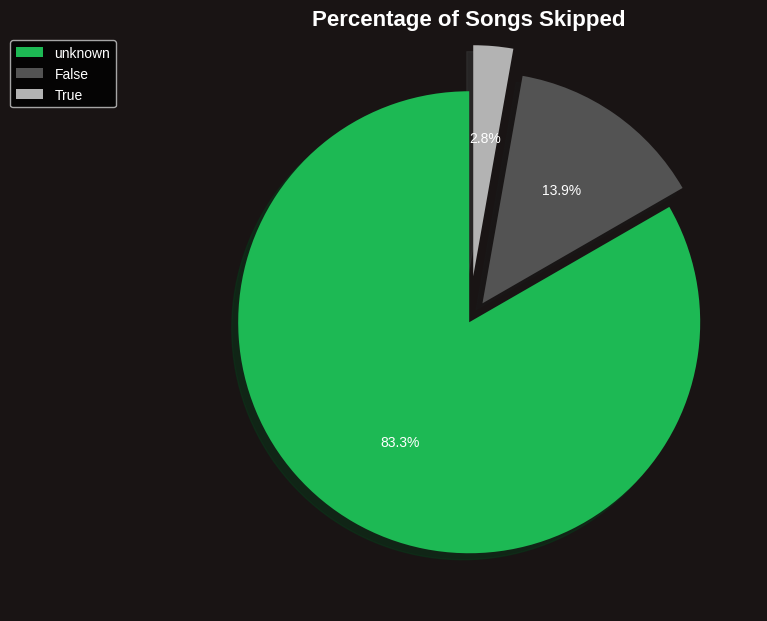

In [ ]:
createPieChart(df['skipped'], 'Percentage of Songs Skipped', 'SongSkipsPieChartUnknown')

This graph shows the songs skipped with unknowns included as this parameter was not tracked in the early days of Spotify

##Songs Skipped

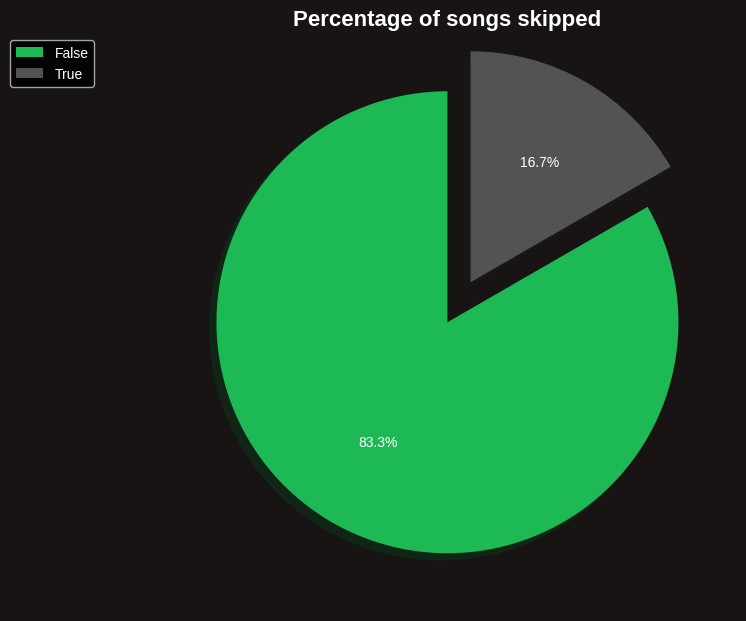

In [ ]:
createPieChart(df['skipped'][df['skipped'] != 'unknown'], "Percentage of songs skipped", "SongSkipsPieChart")

This graph also shows songs skipped but removes any unknown skips.

##Listening Platform

Listening platform is very messy as what classifies as a listening platform is wide and expanding as more data becomes available. Each phone, computer etc are classified as a different device. To make it as simple as possible, this takes the main component or OS of the system and counts that as the device. So any laptops are combined into windows and phones combined to apple or android etc.

In [ ]:
# get each instance of platform
platform_count = df['platform'].value_counts()
# create a dict manually based on the devices, can add more as needed
new_platform_count = {'Windows': 0, 'Android': 0, 'Google_Home': 0, 'web_player': 0, 'tv': 0, 'ios': 0, 'osx': 0}

platform_list = list(new_platform_count.keys())

# loop the count and dictionary and increment the dictionary based on occurences in the count
for index, i in enumerate(platform_count.index):
  for j in new_platform_count:
    if j.upper() in i.upper():
      new_platform_count[j] += platform_count[i]
      break;

# conv to dataframe
platformdf = pd.DataFrame(list(new_platform_count.items()), columns=['Platform', 'Count'])

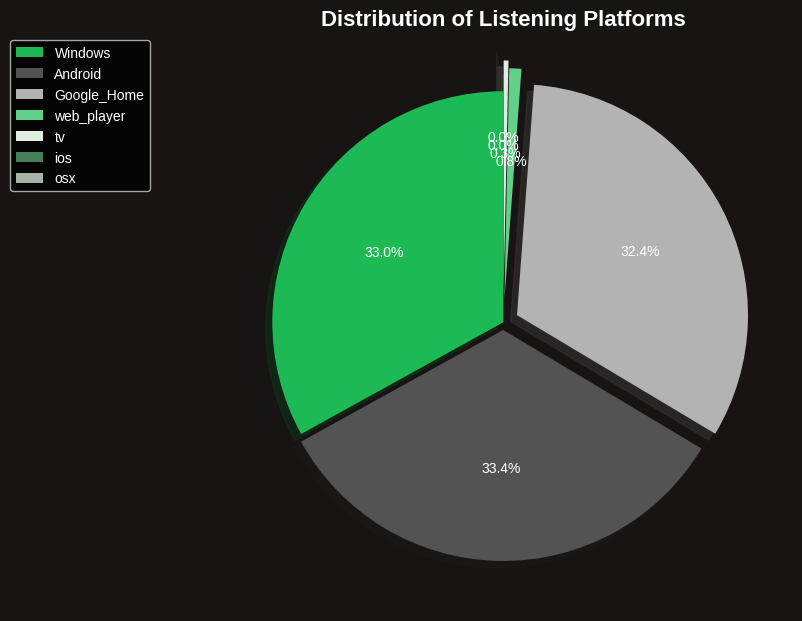

In [ ]:
createPieChart(platformdf, "Distribution of Listening Platforms", "ListeningPlatform", False)

Graph shows a distributuion based on listening platform.

##Reason Song Ended

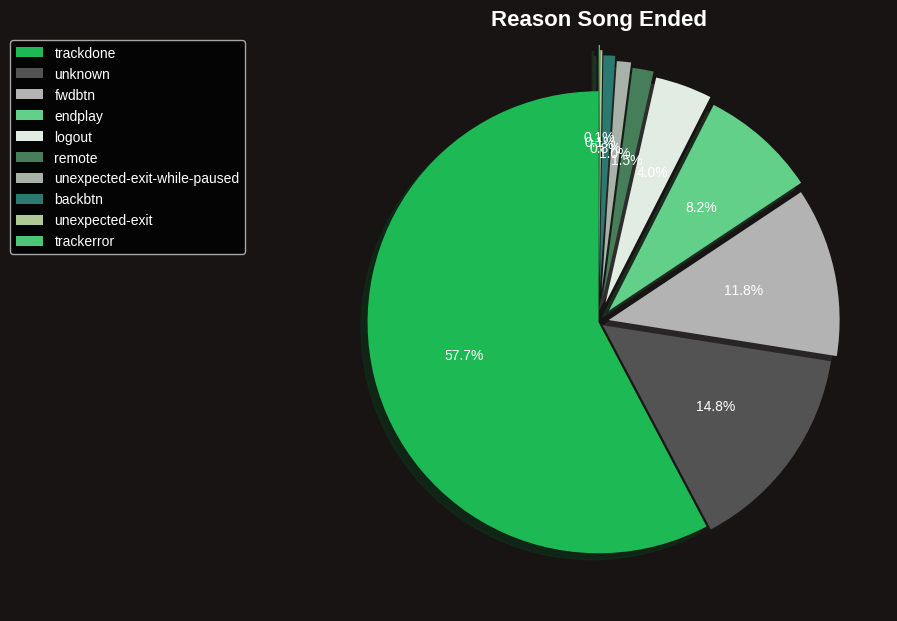

In [ ]:
createPieChart(df['reason_end'], "Reason Song Ended", 'ReasonSongEnded')

Graph based on why a track ended, it is most likely for users that a song should end because it reached its end but skips or fwdbtn have a chance of being high depending on the user.

##Reason Song Started

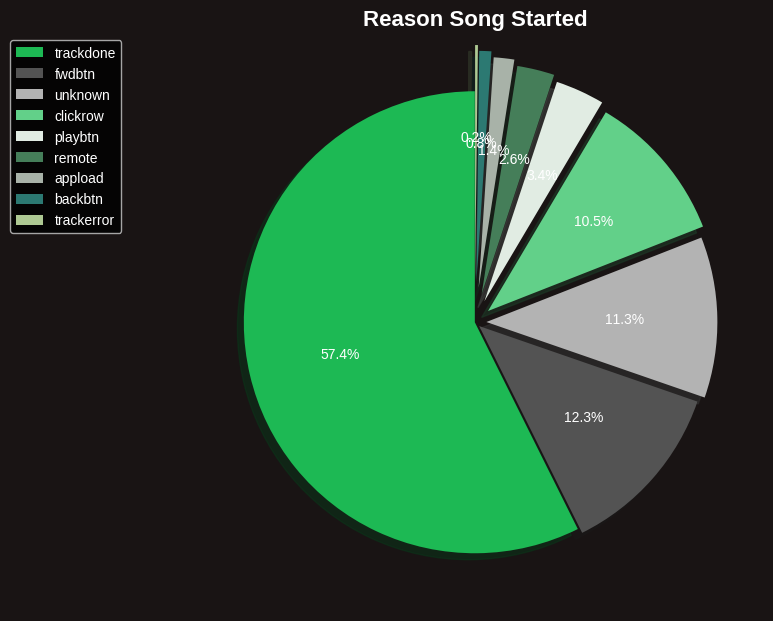

In [ ]:
createPieChart(df['reason_start'], "Reason Song Started", 'ReasonSongStarted')

Graph shows the reason a song started, it should be expected that the reason a song started is because the previous song finished.

##Timestamp Graphs

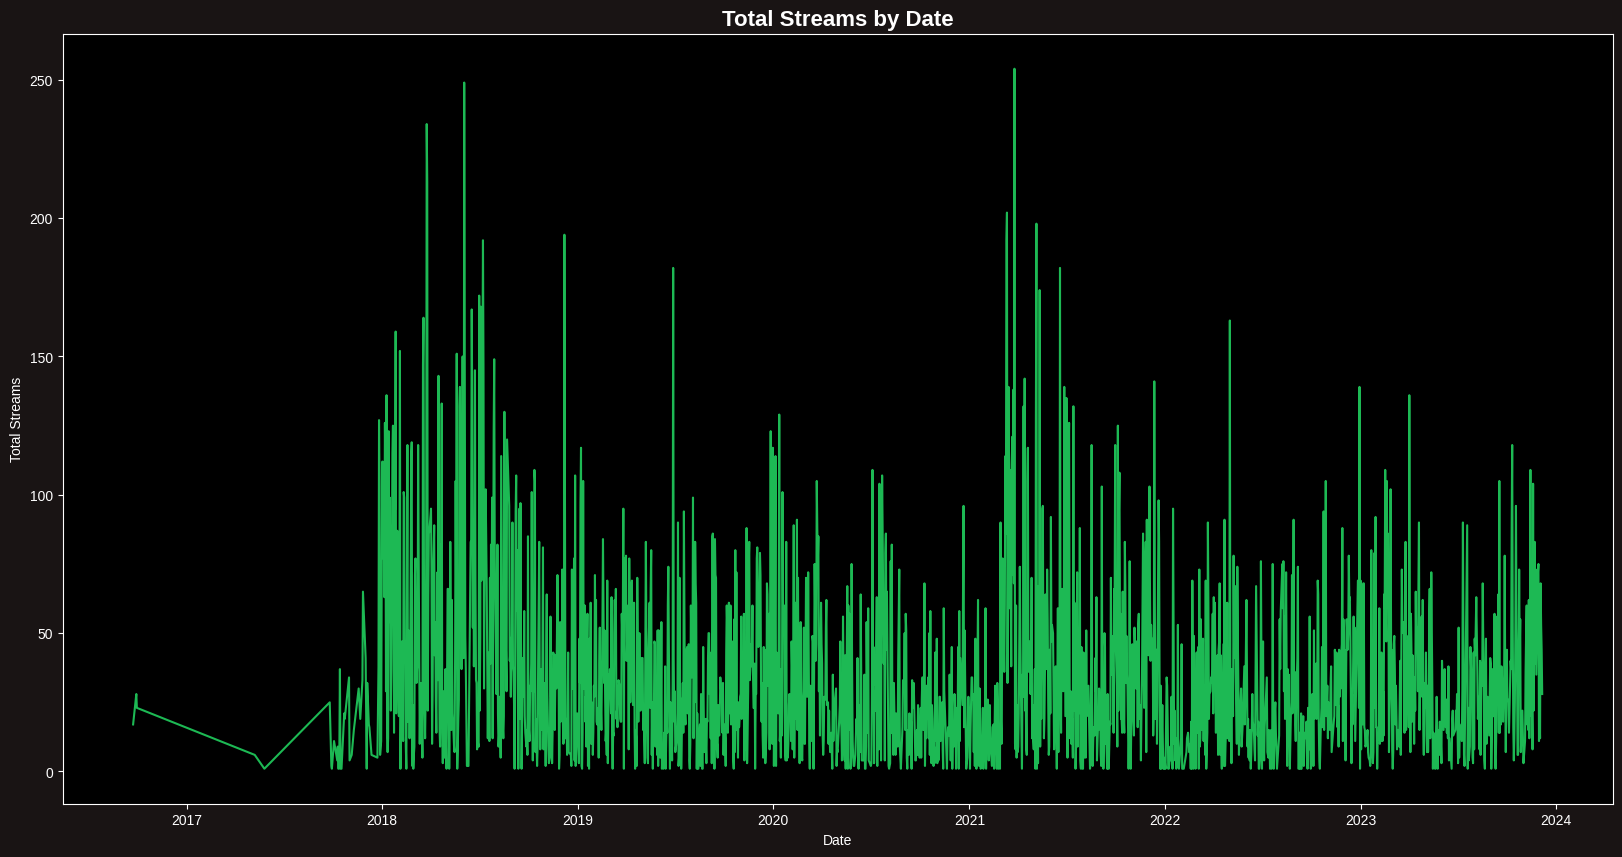

In [ ]:
# get value and labels of value_counts of date
labels, data = df['date'].value_counts().index, df['date'].value_counts()
# plot figure
plt.figure(figsize=(20,10), facecolor=spotify_black)
# plot dates
df['date'].value_counts().plot(color=spotify_green)
#labels, title, save and show
plt.title("Total Streams by Date", color='white', fontsize=16, fontweight='bold', loc='center')
plt.xlabel("Date", color=spotify_white)
plt.ylabel("Total Streams", color=spotify_white)
plt.savefig('StreamsByDateLine.png', format='png', bbox_inches='tight')
plt.show()

Line chart can show interesting data on when a person started listening to Spotify, when it became a daily thing for them, average listens, most listens etc.

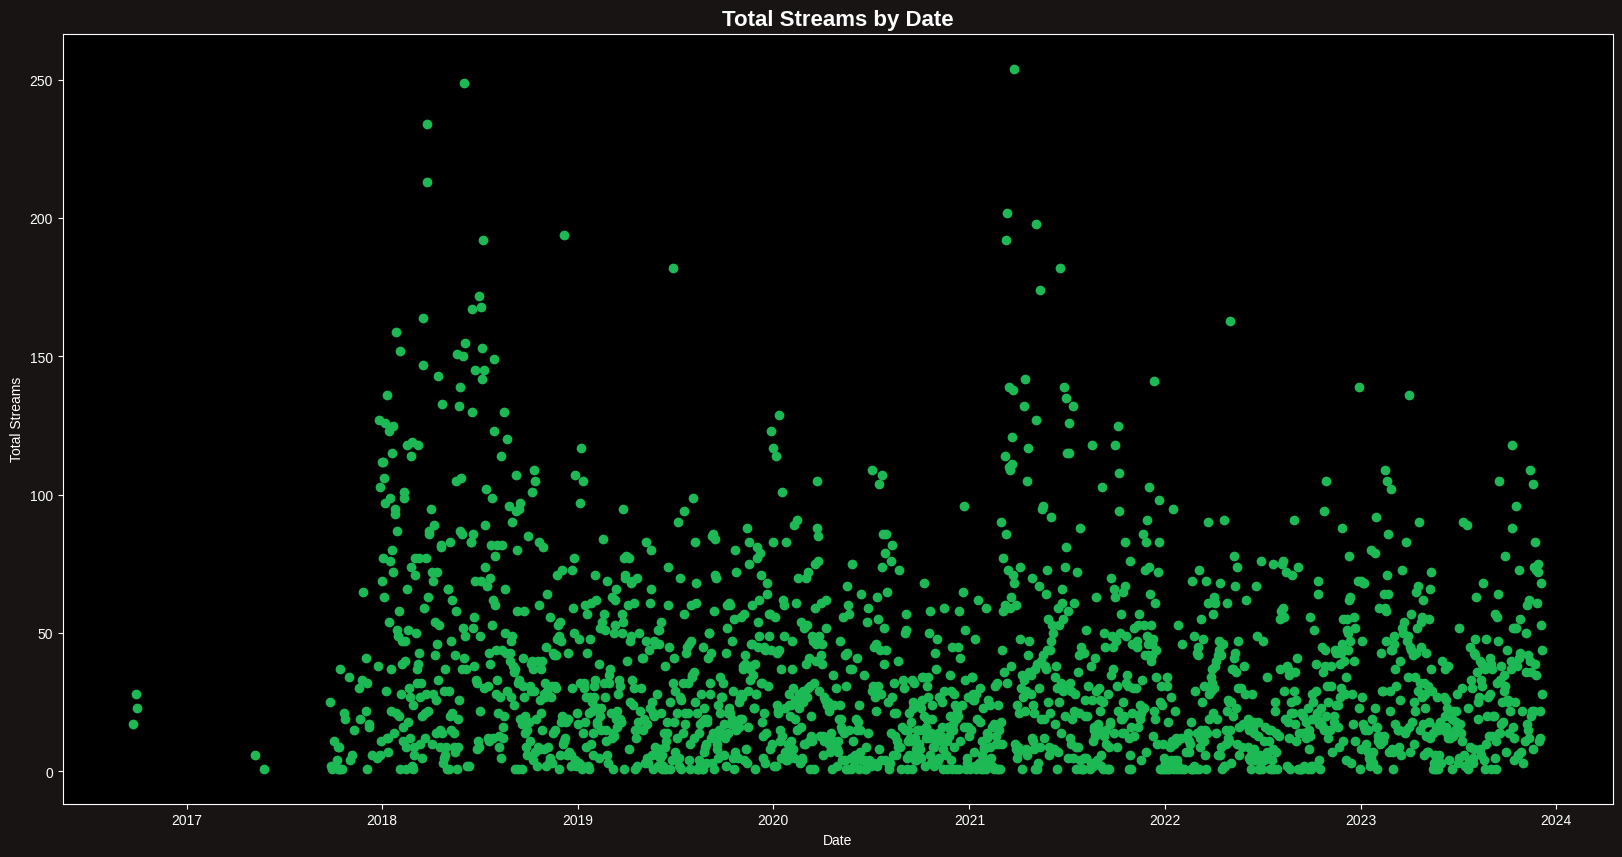

In [ ]:
# isolate the dates
dates = [pd.to_datetime(d) for d in df['date'].value_counts().index]
# plot
plt.figure(figsize=(20,10), facecolor=spotify_black)
# scatter the dates
plt.scatter(dates, df['date'].value_counts(), color=spotify_green)
# title, labels, save and show
plt.title("Total Streams by Date" , color=spotify_white, fontsize=16, fontweight='bold', loc='center')
plt.xlabel("Date", color=spotify_white)
plt.ylabel("Total Streams", color=spotify_white)
plt.savefig('StreamsByDateScatter.png', format='png', bbox_inches='tight')
plt.show()

##Country

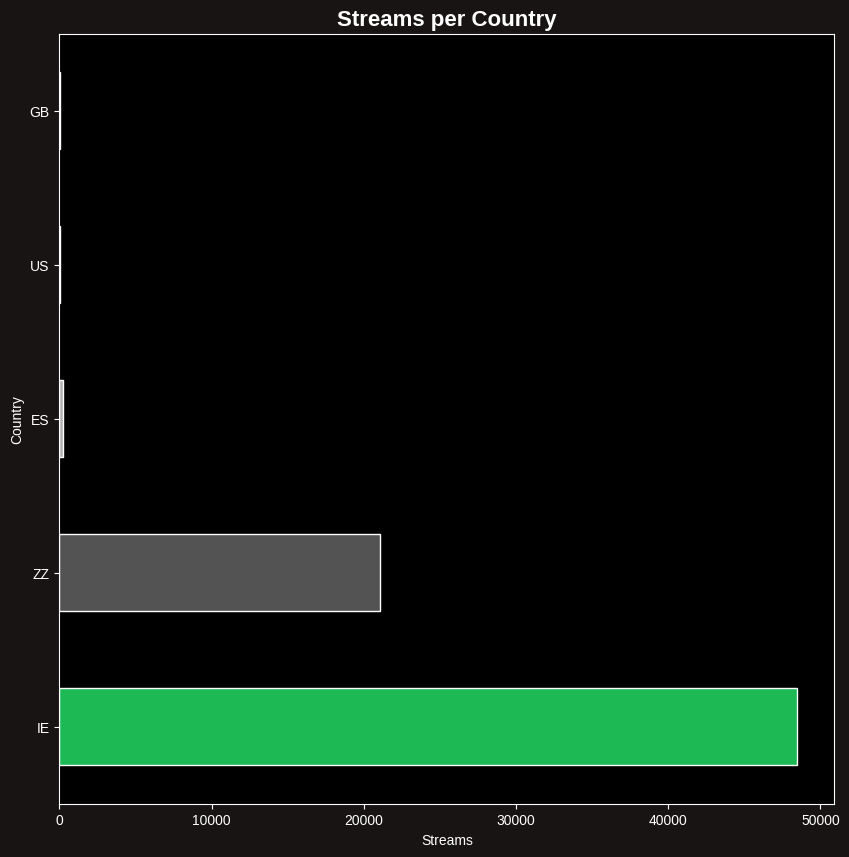

In [ ]:
createBarChart(df['conn_country'].value_counts(), 'Streams per Country', 'Streams', 'Country', 'StreamsPerCountry')

Would be a much more interesting graph for someone has lived and travelled in many different countries

##Top Artists

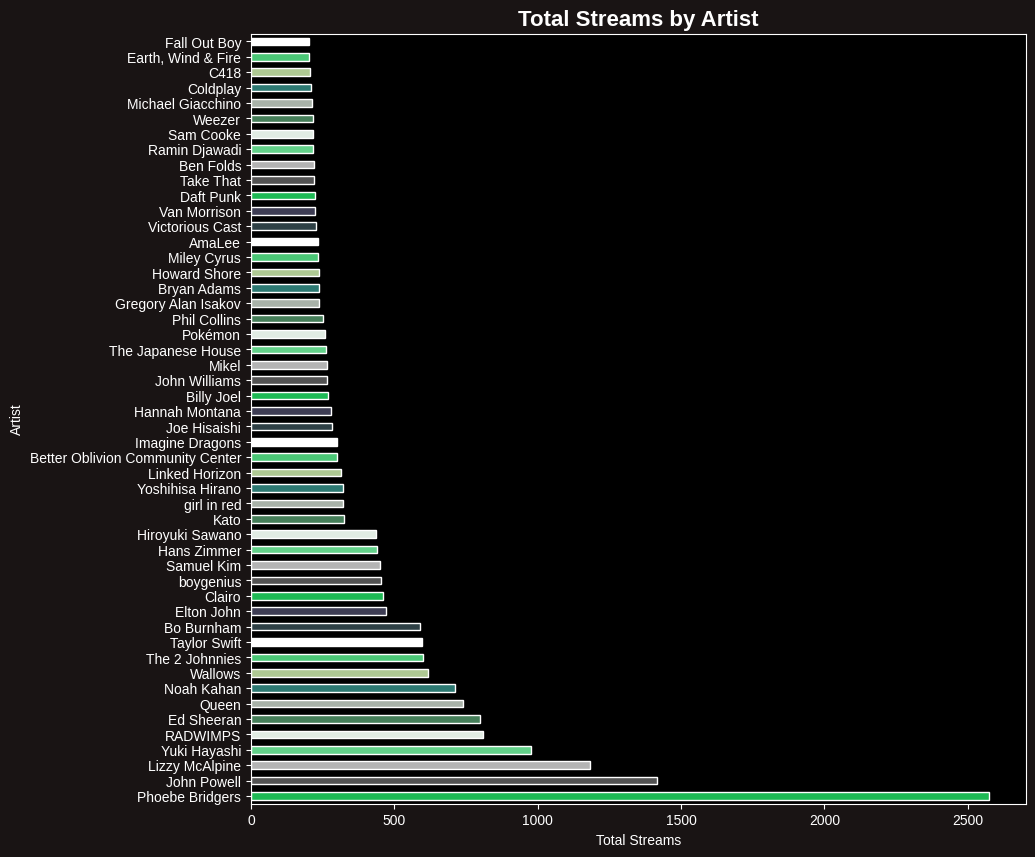

In [ ]:
# limits to the threshold of 50
artist_count = df['master_metadata_album_artist_name'].value_counts().head(threshold)
createBarChart(artist_count, 'Total Streams by Artist', 'Total Streams', 'Artist', 'ArtistStreams')

Each person will have differnt top artists

##Top Tracks

<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current fon

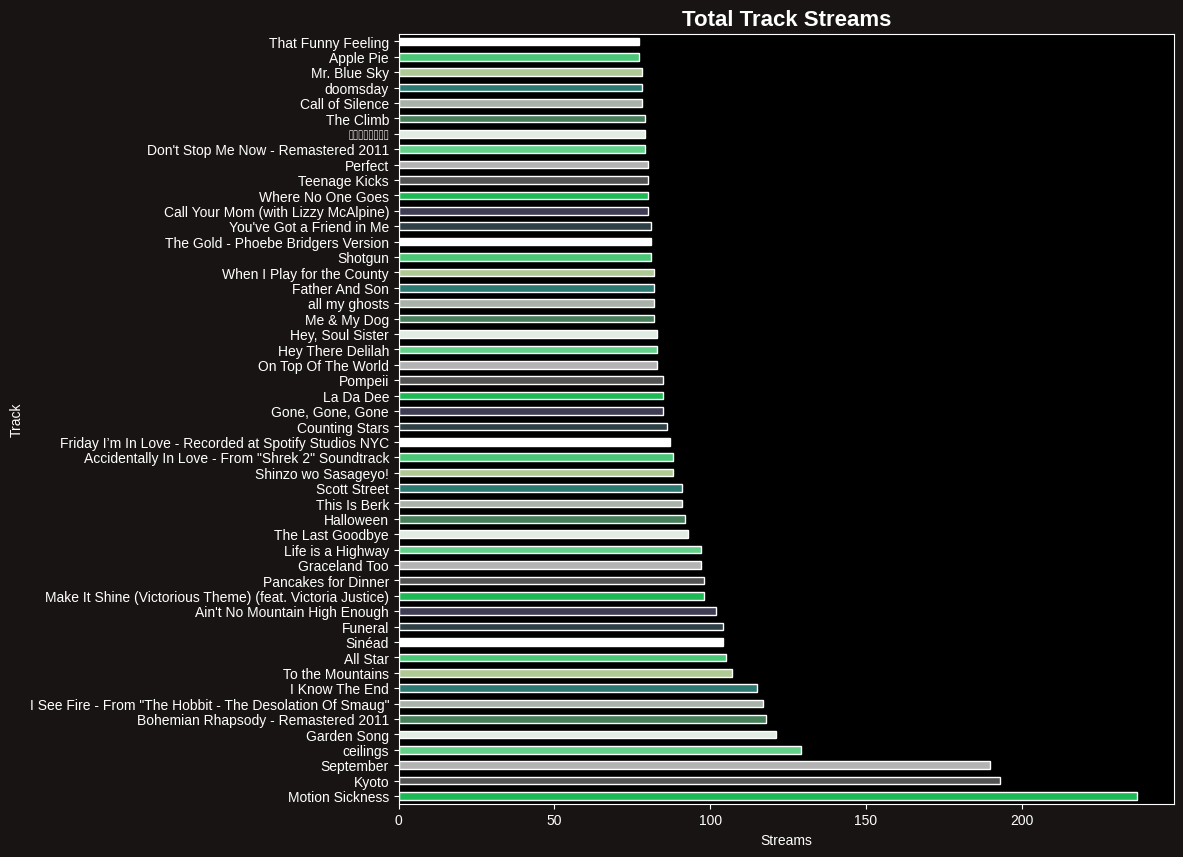

In [ ]:
track_count = df['master_metadata_track_name'].value_counts().head(threshold)
createBarChart(track_count, 'Total Track Streams', 'Streams', 'Track', 'TrackStreams')

Each person will have different top tracks, the square characters represent a disconnect between the google colab and matplotlibs font for outputting characters in a different language in this case Japanese kanji.

##Top Albums

<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from current font.
  plt.savefig(f'{file}.png', format='png', bbox_inches='tight')
<ipython-input-110-bb1a64c3ac85>:13: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current fo

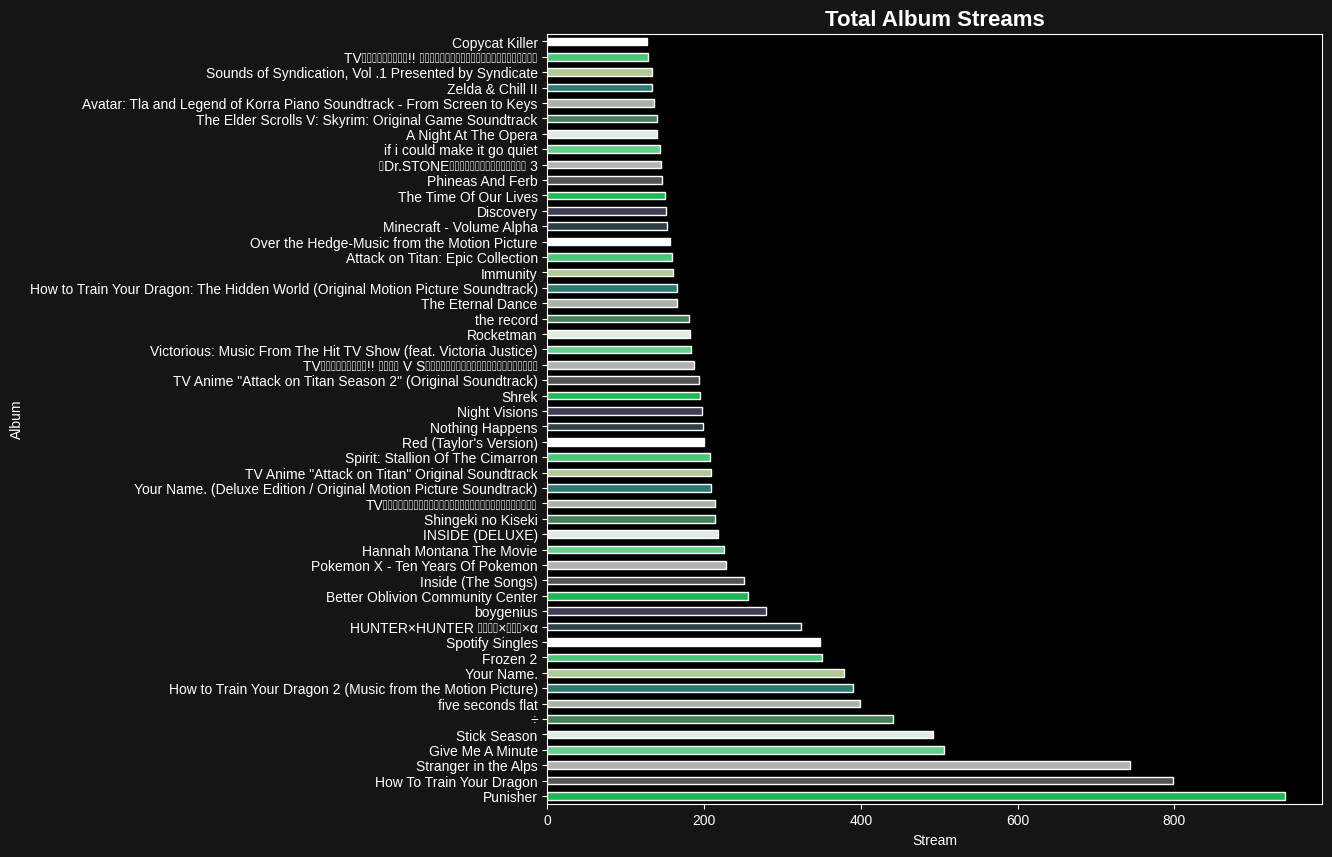

In [ ]:
album_count = df['master_metadata_album_album_name'].value_counts().head(threshold)
createBarChart(album_count, 'Total Album Streams', 'Stream', 'Album', 'AlbumStreams')

Every person will have different top albums

#First Listened Functions

In [ ]:
# returns 0 pos of the whatever column value counts is passed in
def first_listened(df, column, value, count):
  first_listened = df.loc[df[column] == value.index[count]].iloc[0]['date']
  return first_listened.strftime('%d %m %Y')

##Album

In [ ]:
album_first_listened = first_listened(df, 'master_metadata_album_album_name', album_count, 0)
album_first_listened

'12 09 2020'

##Artist

In [ ]:
track_first_listened = first_listened(df, 'master_metadata_track_name', track_count, 0)
track_first_listened

'12 09 2020'

##Track

In [ ]:
artist_first_listened = first_listened(df, 'master_metadata_album_artist_name', artist_count, 0)
track_first_listened

'12 09 2020'

#Top Songs of Favourite Artist

In [ ]:
# returns the top 5 tracks of a specified artist index
def topArtistTracks(df, index):
  most_listened_artist_df = df[df['master_metadata_album_artist_name'] == artist_count.index[index]]
  top_artist_tracks = most_listened_artist_df['master_metadata_track_name'].value_counts().head(5)
  return top_artist_tracks

In [ ]:
for i in range(5):
  exec(f'artist_top_songs_{i} = topArtistTracks(df, i)')

In [ ]:
for i in range(5):
  var = f'artist_top_songs_{i}'
  print(f"{artist_count.index[i]}\n{locals()[var]}\n")

Phoebe Bridgers
master_metadata_track_name
Motion Sickness    237
Kyoto              192
Garden Song        121
I Know The End     115
Funeral            104
Name: count, dtype: int64

John Powell
master_metadata_track_name
This Is Berk                                                                     91
Where No One Goes                                                                79
Romantic Flight - From How To Train Your Dragon Music From The Motion Picture    69
Test Drive - From How To Train Your Dragon Music From The Motion Picture         68
Forbidden Friendship                                                             55
Name: count, dtype: int64

Lizzy McAlpine
master_metadata_track_name
ceilings               129
To the Mountains       107
Pancakes for Dinner     98
all my ghosts           82
doomsday                78
Name: count, dtype: int64

Yuki Hayashi
master_metadata_track_name
コンセプトの戦い       79
Might*U        55
You Say Run    55
チームの地力         50
Jet Set Run  

#Spotify API

##API Keys

In [ ]:
# retrieves the spotify api keys
client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

##Functions

###Token

In [ ]:
# function that returns an access token
def get_token():
  # combines the id and secret in correct format
  auth_string = client_id + ":" + client_secret
  # encodes in utf format
  auth_bytes = auth_string.encode("utf-8")
  # converts to base64 and turns to string
  auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

  # url for token
  url = "https://accounts.spotify.com/api/token"
  # headers for requesting appropriate metadata
  headers = {
      "Authorization" : "Basic " + auth_base64,
      "Content-Type": "application/x-www-form-urlencoded"
  }
  # specifiy data needed
  data = {"grant_type": "client_credentials"}
  # combine all into post request to get a token
  result = post(url, headers=headers, data=data)
  # conv into json readable format
  json_result = json.loads(result.content)
  # access token part of json
  token = json_result["access_token"]
  # return json
  return token

In [ ]:
# used inside get methods to show token
def get_auth_header(token):
  return {"Authorization": "Bearer " + token}

###Search

In [ ]:
# search function that searches a term and specifies what i.e track, artist, album
def search(token, search, item):
  # url to search
  url = "https://api.spotify.com/v1/search"
  headers = get_auth_header(token)
  # query f string with search and item type
  query = f"?q={search}&type={item}&limit=1"

  # combines url and query and returns a result
  query_url = url + query
  result = get(query_url, headers = headers)
  # convs to json and extracts relevant information
  json_result = json.loads(result.content)[f"{item}s"]["items"]

  # if no result - should be result as no user input only spotify data
  if len(json_result) == 0:
    print(f"No {item} with this name exists...")
    return None

  #return the id of searched item
  return json_result[0]['id']

In [ ]:
# returns metadata of passed in item and id
def get_item(token, id, item):
  # url for get
  url = f"https://api.spotify.com/v1/{item}s/{id}"
  headers = get_auth_header(token)
  # get result
  result = get(url, headers=headers)
  # json result
  json_result = json.loads(result.content)
  # return result
  return json_result

In [ ]:
# funciton for getting related artists
def get_related_artists_by_artist(token, artist_id):

  #uses artist id to return relatede artists
  url = f"https://api.spotify.com/v1/artists/{artist_id}/related-artists"

  # return jsonified result
  headers = get_auth_header(token)
  result = get(url, headers = headers)
  json_result = json.loads(result.content)['artists']

  return json_result

##Information Gathering

In [ ]:
# token - lasts approx ten minutes
token = get_token()

In [ ]:
artist_id=search(token, artist_count.index[0], 'artist')

In [ ]:
# get album stats by extracting info from the json result
def albumStats(result):
  album_artist_name = result['artists'][0]['name']
  album_release_date = result['release_date']
  album_tracks = result['total_tracks']
  return album_artist_name, album_release_date, album_tracks

In [ ]:
# get track stats by extracting info from the json result
def trackStats(result):
  track_artist_name = result['artists'][0]['name']
  track_release_date = result['album']['release_date']
  return track_artist_name, track_release_date

In [ ]:
# gets the cover of a specified item
def cover(token, id, item):
  result = get_item(token, id, item)
  #if track have to alter the json slighly
  if item == 'track':
    cover = result['album']['images'][0]['url']
  else:
    cover = result['images'][0]['url']
  # uses the urllib library to get the cover
  urllib.request.urlretrieve(cover, f'{item}_cover.png')


In [ ]:
# gets info relating to top album
album_id = search(token, album_count.index[0], 'album')
result = get_item(token, album_id, 'album')
album_artist_name, album_release_date, album_tracks = albumStats(result)

In [ ]:
# gets info relating to top track
track_id = search(token, track_count.index[0], 'track')
result = get_item(token, track_id, 'track')
track_artist_name, track_release_date = trackStats(result)

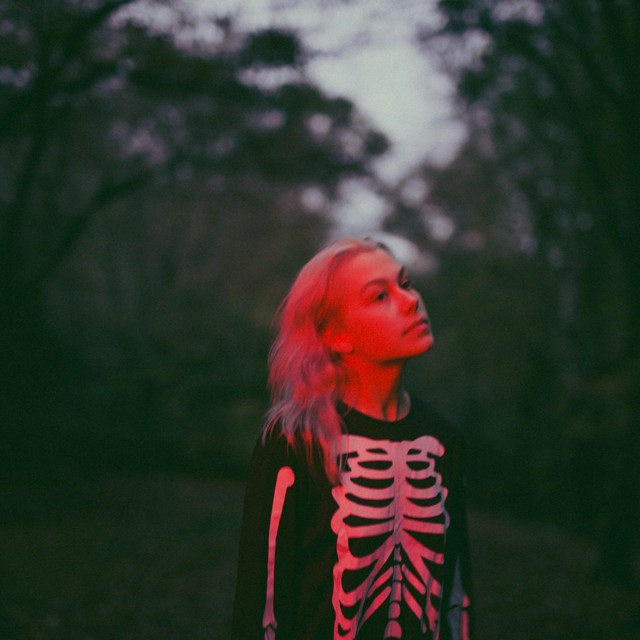

In [ ]:
# artist cover
cover(token, artist_id, 'artist')
artist_img = Image.open("artist_cover.png")
artist_img

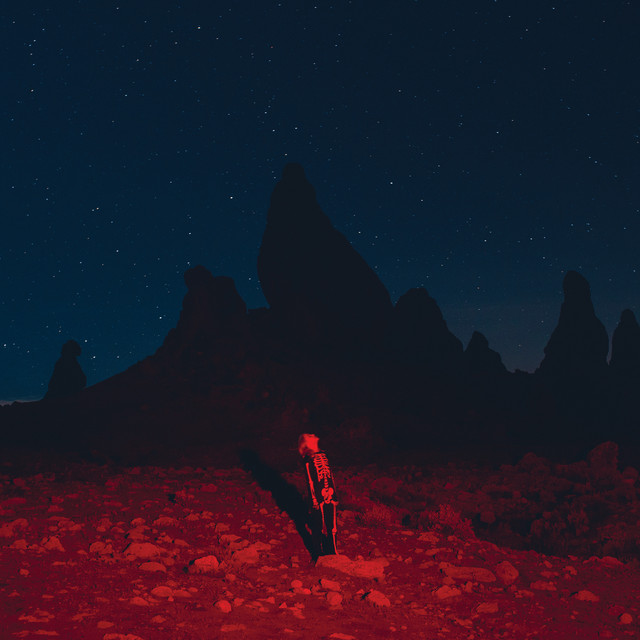

In [ ]:
# album cover
cover(token, album_id, 'album')
album_img = Image.open("album_cover.png")
album_img

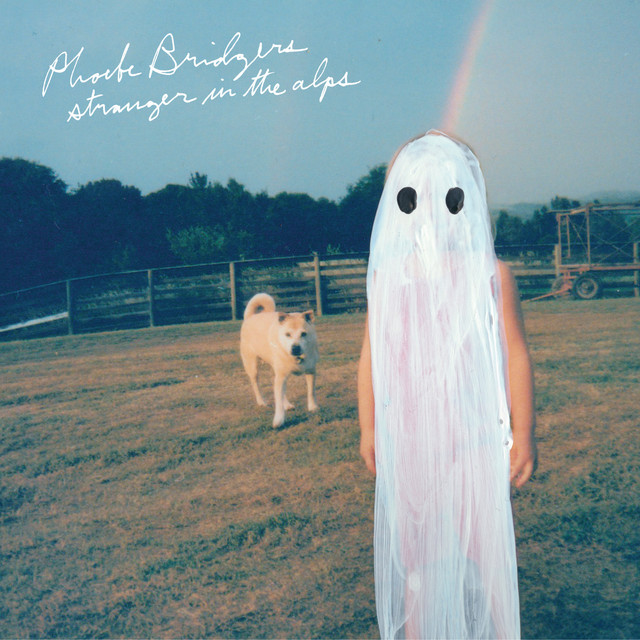

In [ ]:
# track cover
cover(token, track_id, 'track')
track_img = Image.open("track_cover.png")
track_img

#Song Features

In [ ]:
# create a blank df
dffeatures = pd.DataFrame()
# loop tracks
for track in track_count.index:
  # search each track
  track_id = search(token, track, 'track')

  # get the features of that track
  track_features = get_item(token, track_id, 'audio-feature')
  # normalise them into a df
  track_df = pd.json_normalize(track_features)
  # add the track to a df
  track_df['Track'] = track
  #combine both
  dffeatures = pd.concat([dffeatures, track_df])
#output
dffeatures

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.651  0.5460    1    -9.021     1       0.0357      0.774000   
0         0.600  0.7490   11    -6.889     1       0.0419      0.046700   
0         0.697  0.8320    9    -7.264     1       0.0298      0.168000   
0         0.516  0.3220    9   -11.762     1       0.0292      0.473000   
0         0.426  0.2740    0   -16.649     1       0.1460      0.856000   
0         0.392  0.4020    0    -9.961     0       0.0536      0.288000   
0         0.313  0.0605    1   -23.445     1       0.0294      0.871000   
0         0.323  0.3230    1   -10.268     1       0.0351      0.330000   
0         0.461  0.1470    4   -14.022     1       0.0330      0.918000   
0         0.731  0.8670   11    -5.881     1       0.0320      0.039500   
0         0.512  0.5740    5    -7.016     1       0.0273      0.042500   
0         0.580  0.8330    9    -3.904     0       0.2620      0.007160   
0         0.663  0.6000    7   -10.870     1       0.0320      0.430000   
0         0.520  0.9330    5    -2.884     1       0.0541      0.000137   
0         0.753  0.2660   11   -11.453     1       0.0478      0.759000   
0         0.448  0.3380   10   -10.373     1       0.0296      0.871000   
0         0.562  0.9340    5    -5.562     1       0.0607      0.002110   
0         0.304  0.1750    0   -14.034     1       0.0311      0.892000   
0         0.550  0.7040    6   -11.162     0       0.0304      0.024000   
0         0.255  0.4890    3    -9.459     1       0.0587      0.512000   
0         0.508  0.4170   10    -9.632     1       0.0296      0.770000   
0         0.440  0.9830    0    -4.360     1       0.0868      0.220000   
0         0.555  0.9260    7    -3.613     1       0.0363      0.048400   
0         0.448  0.1230    7   -15.193     1       0.0409      0.948000   
0         0.664  0.7050    1    -4.972     0       0.0382      0.065400   
0         0.664  0.6420    6    -5.961     1       0.0380      0.129000   
0         0.657  0.8280    5    -5.544     1       0.0728      0.008470   
0         0.679  0.7150    9    -6.383     1       0.0407      0.075500   
0         0.635  0.9260    0    -5.589     1       0.1510      0.089300   
0         0.656  0.2910    2   -10.572     1       0.0293      0.872000   
0         0.673  0.8860    1    -4.440     0       0.0431      0.185000   
0         0.657  0.7410   11    -6.822     0       0.0825      0.663000   
0         0.638  0.2930    3   -11.703     1       0.0478      0.342000   
0         0.495  0.3260    7   -12.290     1       0.0365      0.541000   
0         0.634  0.5990    9    -9.134     1       0.1080      0.050400   
0         0.673  0.7350    5    -4.733     1       0.0457      0.286000   
0         0.299  0.3990   10   -12.176     1       0.0376      0.816000   
0         0.689  0.3330    0   -12.134     0       0.0307      0.817000   
0         0.437  0.2370    0   -11.373     1       0.0348      0.738000   
0         0.501  0.8790    9    -7.400     1       0.0565      0.017500   
0         0.415  0.7820    2    -6.745     1       0.0461      0.001100   
0         0.599  0.4480    8    -6.312     1       0.0232      0.163000   
0         0.563  0.8650    5    -5.277     1       0.1600      0.047200   
0         0.423  0.9610    2    -4.312     0       0.0617      0.000038   
0         0.327  0.5880    4    -6.611     1       0.0336      0.083400   
0         0.504  0.3800    6   -11.826     0       0.0370      0.642000   
0         0.826  0.6790   10    -8.140     0       0.1110      0.084400   
0         0.388  0.3380   10   -10.054     1       0.0329      0.652000   
0         0.655  0.4960    3    -4.139     0       0.0364      0.033500   
0         0.515  0.2980    4   -11.499     1       0.0311      0.718000   

   instrumentalness  liveness  valence    tempo            type  \
0          0.043700    0.0842   0.6230  107.021  audio_features   
0          0.295000    0.0915   0.4850  131

In [ ]:
# clean to features wanted
dffeatures = dffeatures[['Track','danceability', 'energy', 'key', 'loudness', 'mode',
      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
      'tempo', 'duration_ms','time_signature']]

# use describe
dffeatures.describe()

danceability     energy        key   loudness       mode  speechiness  \
count     50.000000  50.000000  50.000000  50.000000  50.000000    50.000000   
mean       0.541480   0.563750   5.280000  -8.816360   0.780000     0.055184   
std        0.135011   0.264504   3.741876   3.964215   0.418452     0.043893   
min        0.255000   0.060500   0.000000 -23.445000   0.000000     0.023200   
25%        0.442000   0.327750   2.000000 -11.433000   1.000000     0.032000   
50%        0.552500   0.581000   5.000000  -8.580500   1.000000     0.037800   
75%        0.656750   0.816500   9.000000  -5.662000   1.000000     0.055900   
max        0.826000   0.983000  11.000000  -2.884000   1.000000     0.262000   

       acousticness  instrumentalness   liveness    valence       tempo  \
count     50.000000         50.000000  50.000000  50.000000   50.000000   
mean       0.368214          0.105696   0.188140   0.439898  128.634220   
std        0.342909          0.268222   0.134279   0.224835   24.110426   
min        0.000038          0.000000   0.055600   0.053500   78.809000   
25%        0.047500          0.000000   0.100700   0.270250  112.805500   
50%        0.253000          0.000005   0.128500   0.440500  126.680500   
75%        0.733000          0.001783   0.242750   0.565250  143.418750   
max        0.948000          0.950000   0.770000   0.979000  177.765000   

         duration_ms  time_signature  
count      50.000000       50.000000  
mean   224134.540000        3.900000  
std     58853.912343        0.505076  
min    110520.000000        1.000000  
25%    188715.000000        4.000000  
50%    218066.500000        4.000000  
75%    246146.750000        4.000000  
max    400566.000000        5.000000

In [ ]:
dffeatures

Track  danceability  energy  \
0                                    Motion Sickness         0.651  0.5460   
0                                              Kyoto         0.600  0.7490   
0                                          September         0.697  0.8320   
0                                           ceilings         0.516  0.3220   
0                                        Garden Song         0.426  0.2740   
0                Bohemian Rhapsody - Remastered 2011         0.392  0.4020   
0  I See Fire - From "The Hobbit - The Desolation...         0.313  0.0605   
0                                     I Know The End         0.323  0.3230   
0                                   To the Mountains         0.461  0.1470   
0                                           All Star         0.731  0.8670   
0                                             Sinéad         0.512  0.5740   
0                                            Funeral         0.580  0.8330   
0                      Ain't No Mountain High Enough         0.663  0.6000   
0  Make It Shine (Victorious Theme) (feat. Victor...         0.520  0.9330   
0                                Pancakes for Dinner         0.753  0.2660   
0                                      Graceland Too         0.448  0.3380   
0                                  Life is a Highway         0.562  0.9340   
0                                   The Last Goodbye         0.304  0.1750   
0                                          Halloween         0.550  0.7040   
0                                       This Is Berk         0.255  0.4890   
0                                       Scott Street         0.508  0.4170   
0                                Shinzo wo Sasageyo!         0.440  0.9830   
0   Accidentally In Love - From "Shrek 2" Soundtrack         0.555  0.9260   
0  Friday I’m In Love - Recorded at Spotify Studi...         0.448  0.1230   
0                                     Counting Stars         0.664  0.7050   
0                                   Gone, Gone, Gone         0.664  0.6420   
0                                          La Da Dee         0.657  0.8280   
0                                            Pompeii         0.679  0.7150   
0                                On Top Of The World         0.635  0.9260   
0                                  Hey There Delilah         0.656  0.2910   
0                                   Hey, Soul Sister         0.673  0.8860   
0                                        Me & My Dog         0.657  0.7410   
0                                      all my ghosts         0.638  0.2930   
0                                     Father And Son         0.495  0.3260   
0                         When I Play for the County         0.634  0.5990   
0                                            Shotgun         0.673  0.7350   
0                 The Gold - Phoebe Bridgers Version         0.299  0.3990   
0                          You've Got a Friend in Me         0.689  0.3330   
0                Call Your Mom (with Lizzy McAlpine)         0.437  0.2370   
0                                  Where No One Goes         0.501  0.8790   
0                                      Teenage Kicks         0.415  0.7820   
0                                            Perfect         0.599  0.4480   
0                Don't Stop Me Now - Remastered 2011         0.563  0.8650   
0                                           コンセプトの戦い         0.423  0.9610   
0                                          The Climb         0.327  0.5880   
0                                    Call of Silence         0.504  0.3800   
0                                           doomsday         0.826  0.6790   
0                                       Mr. Blue Sky         0.388  0.3380   
0                                          Apple Pie         0.655  0.4960   
0                                 That Funny Feeling         0.515  0.2980   

   key  loudness  mode  speechiness  acousticness  instrumentalness 

Top 50 tracks and their features

<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.savefig(f"{file}.png", format='png', bbox_inches='tight')
<ipython-input-111-ddc3af719369>:13: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current fon

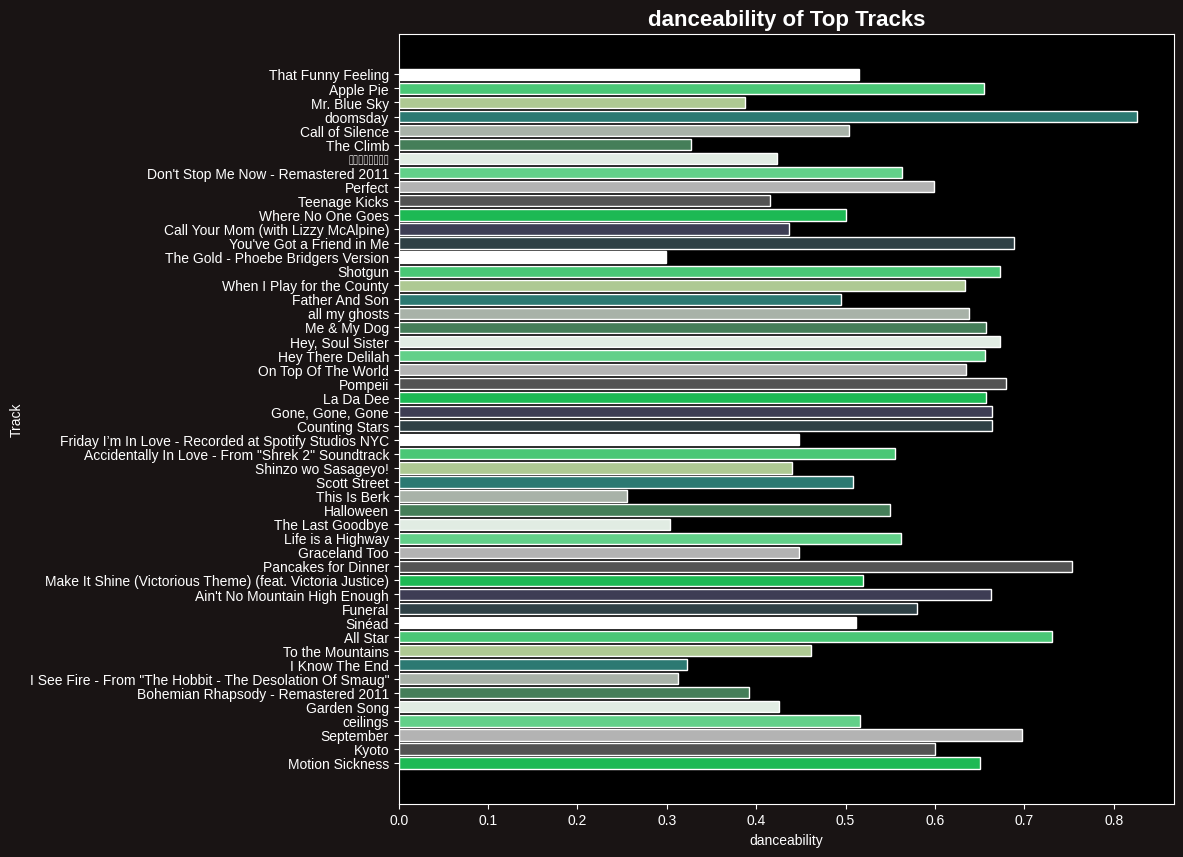

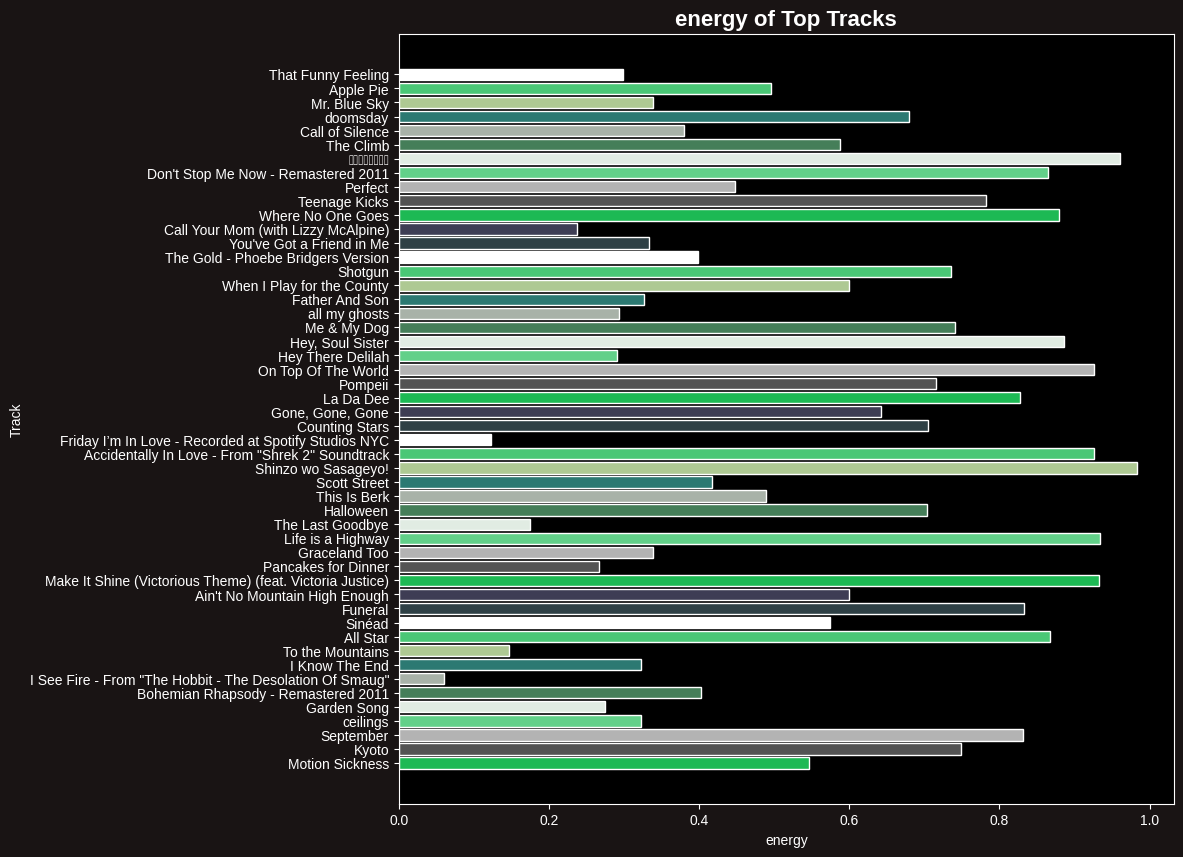

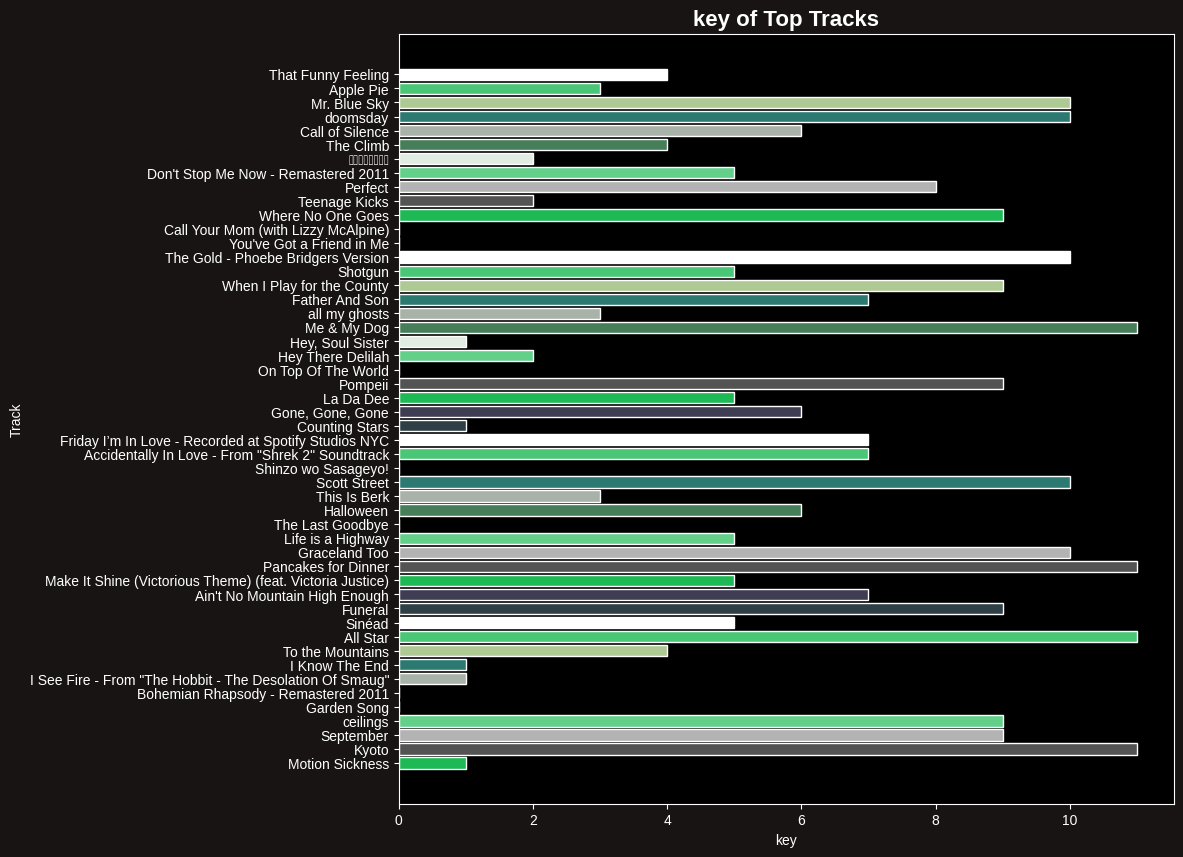

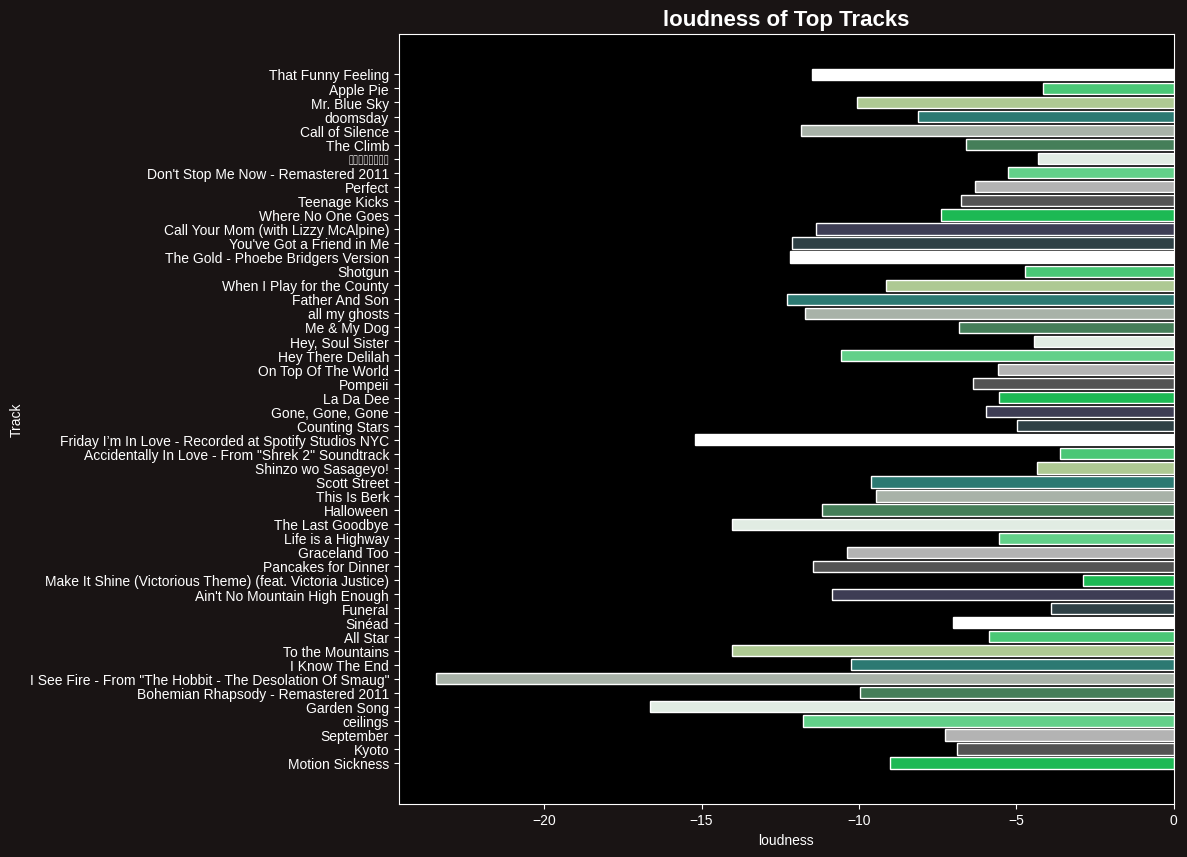

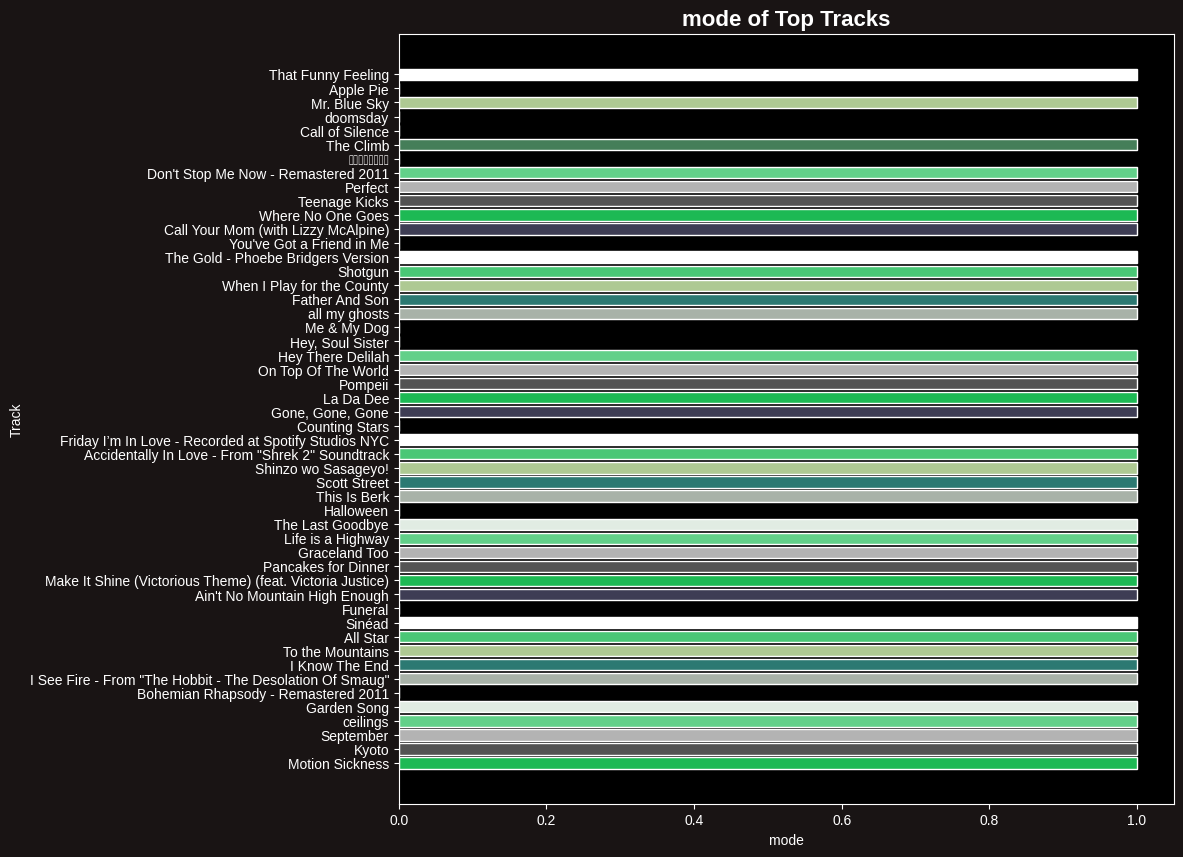

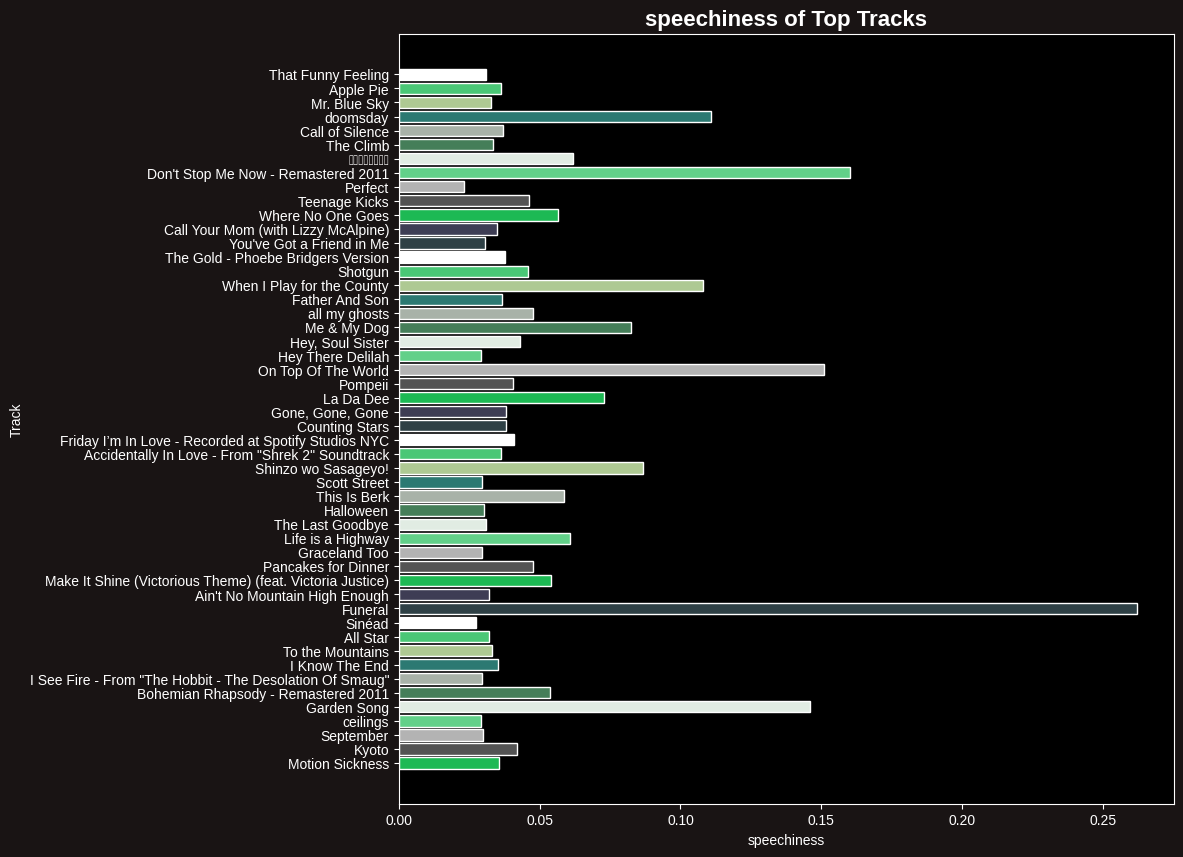

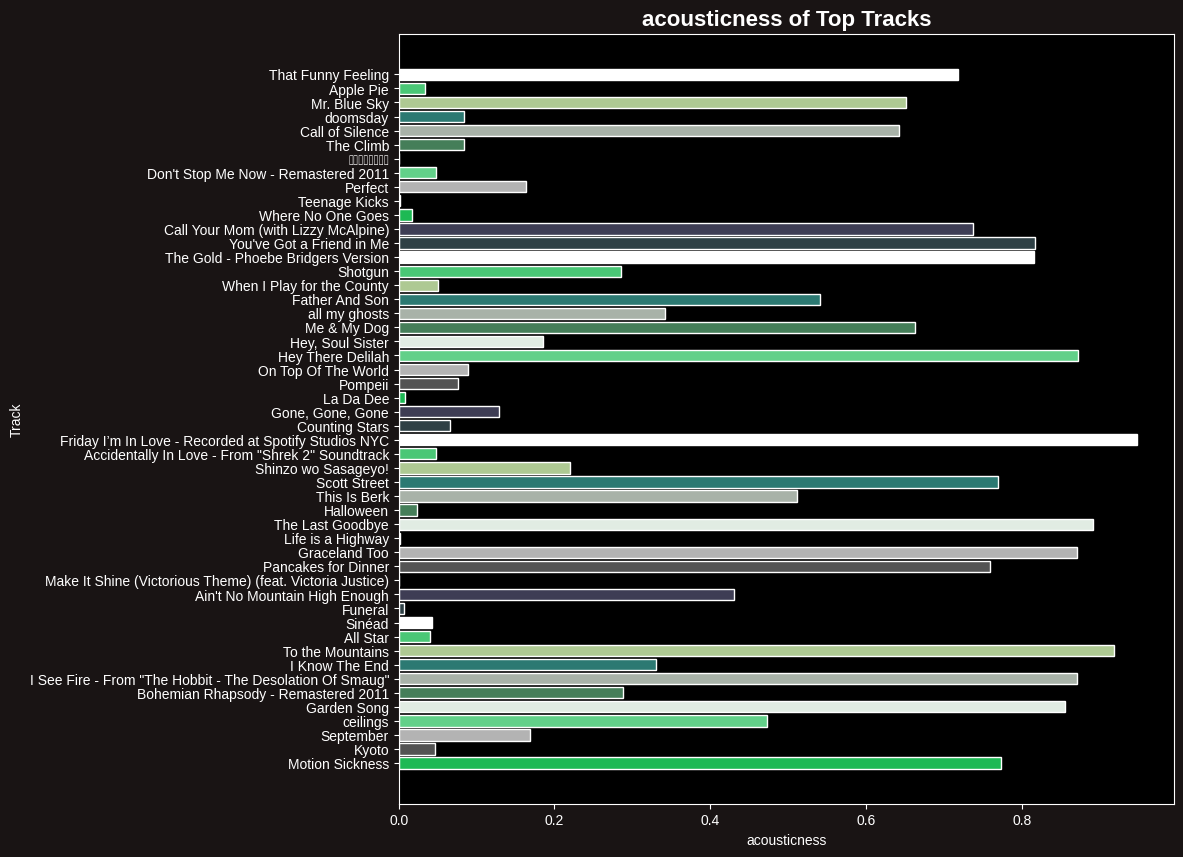

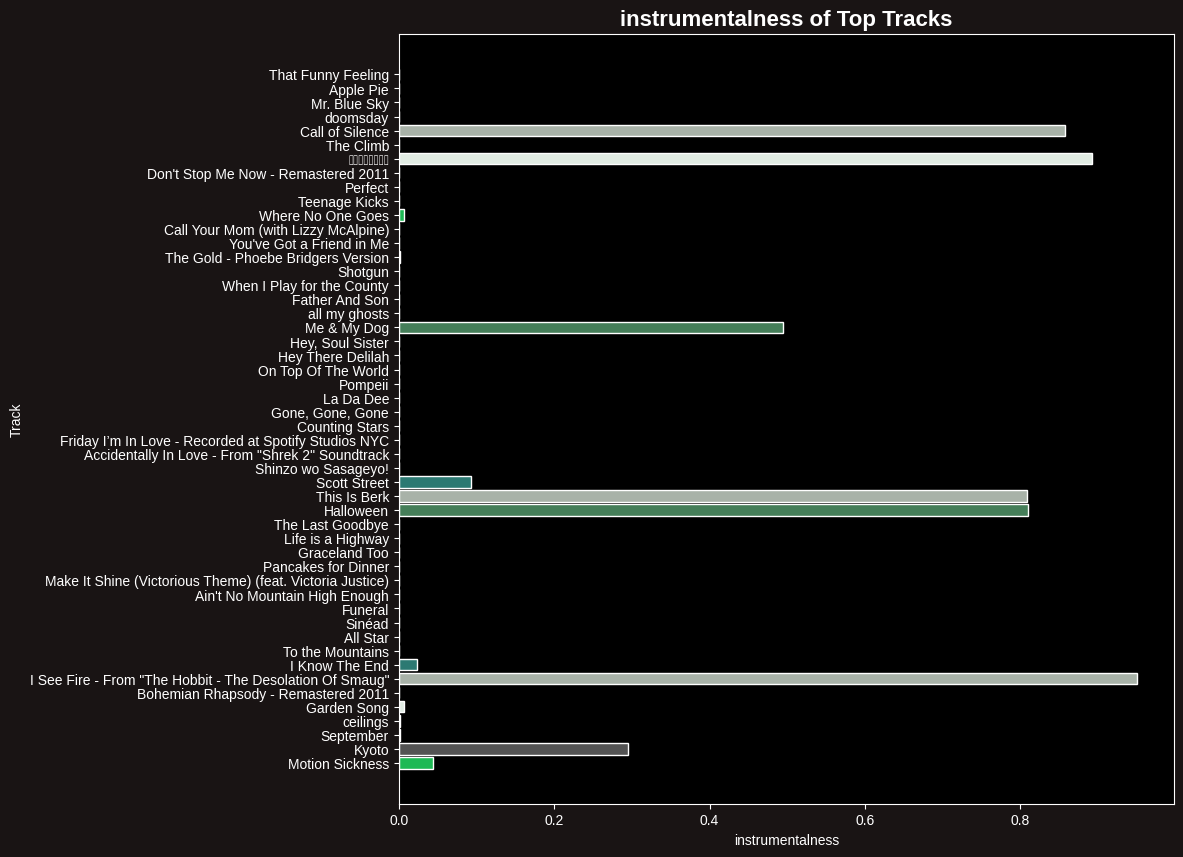

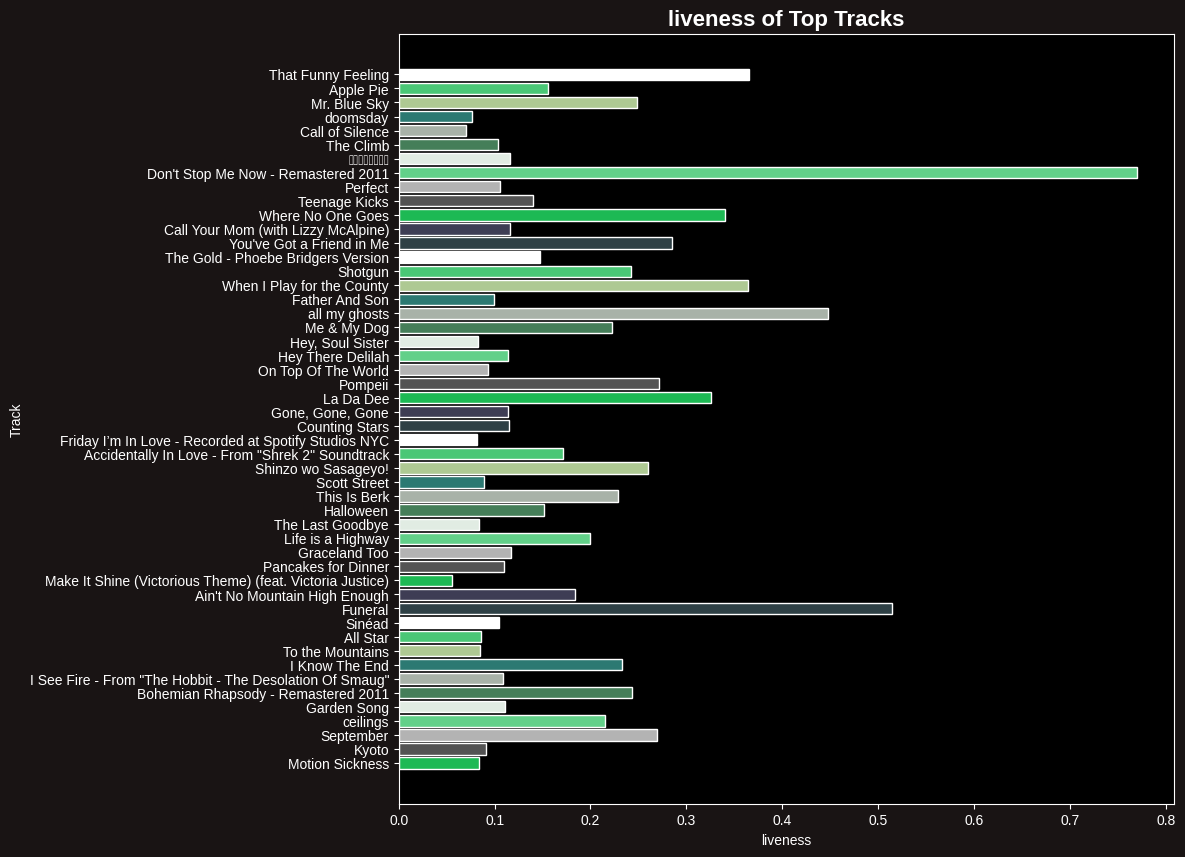

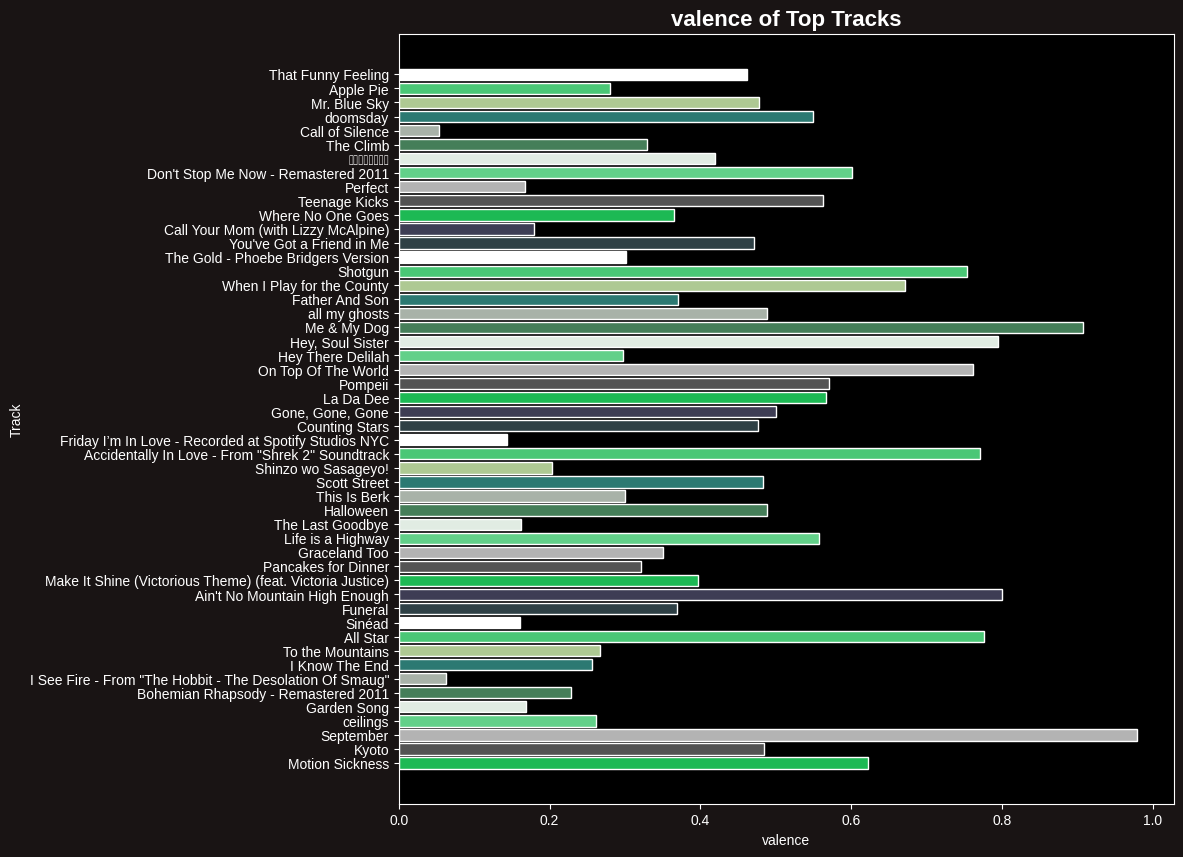

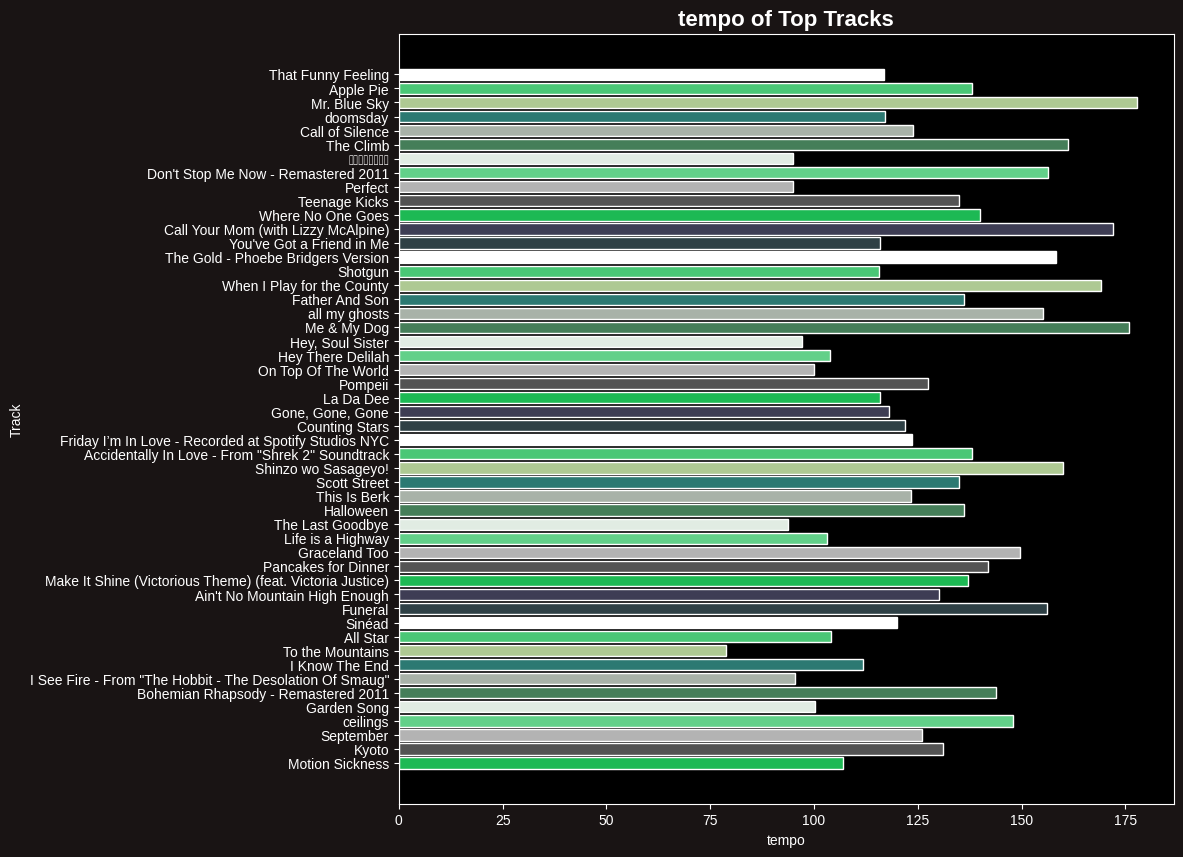

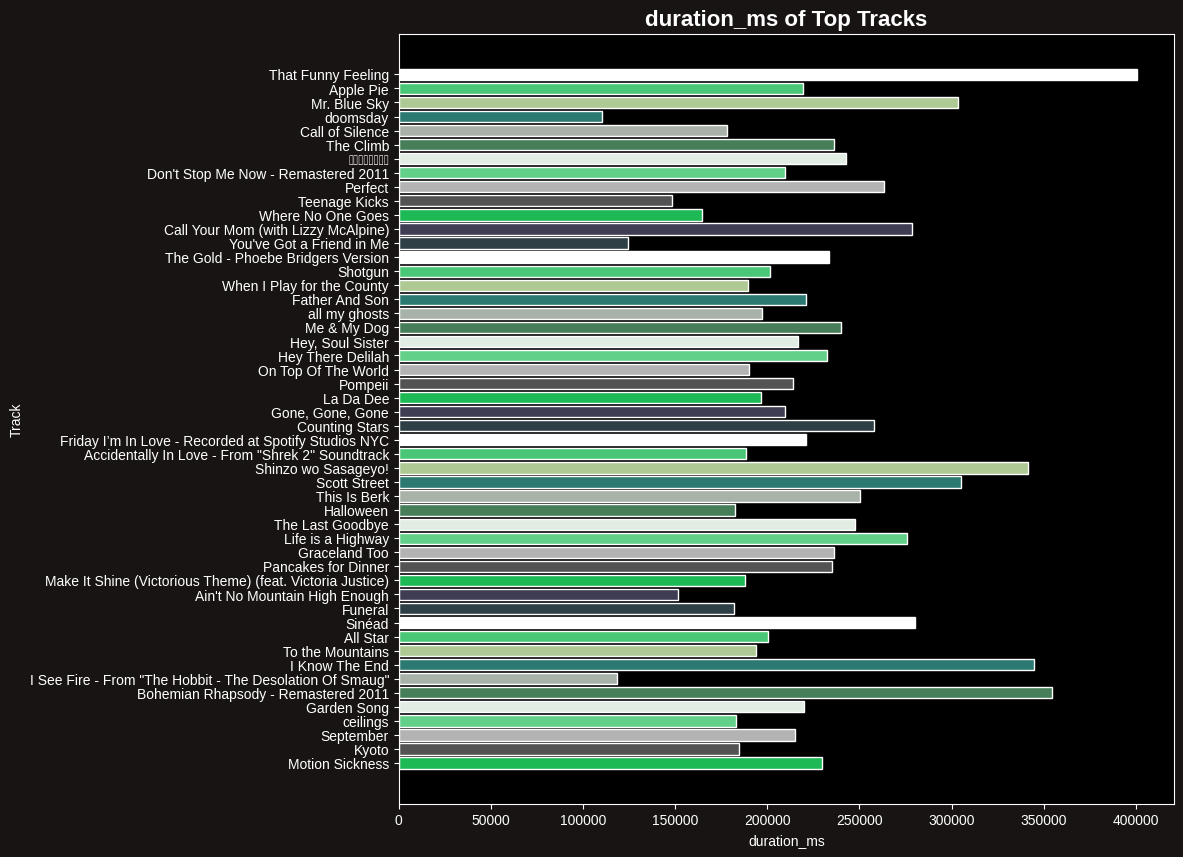

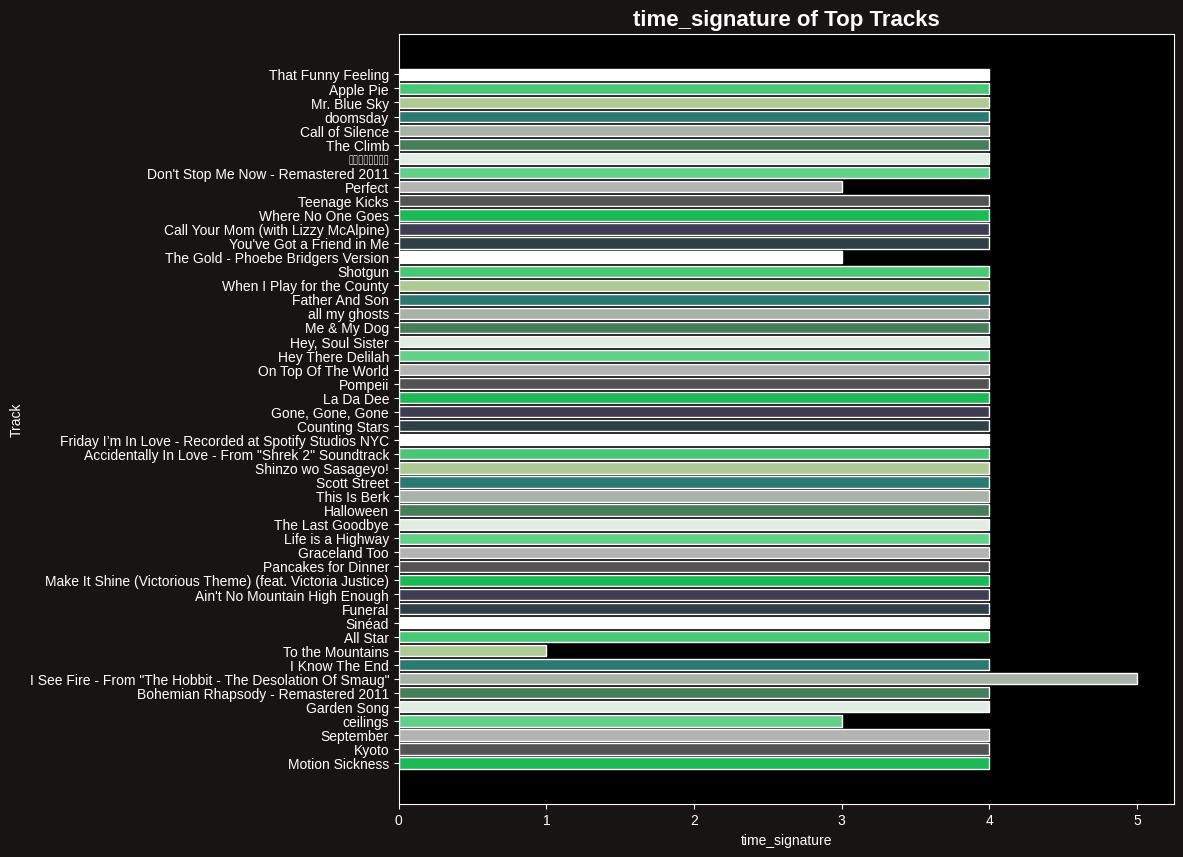

In [ ]:
# loop features
for features in dffeatures:

  # skip track as constant variable
  if features == 'Track':
    continue

  # create bar of each feature agaisnt the track
  createBarChartAlt(dffeatures['Track'], dffeatures[features], f'{features} of Top Tracks', features, 'Track', f'{features}ofTopTracks')
  # plt.figure(figsize=(10, 10), facecolor=spotify_black)
  # plt.barh(dffeatures['Track'], dffeatures[features], color=spotify_colors, hatch='', edgecolor=spotify_white)
  # plt.xlabel(features)
  # plt.ylabel('Track')
  # plt.title(f'{features} of Top Tracks', color=spotify_white, fontsize=16, fontweight='bold', loc='center')
  # plt.savefig(f'{features}ofTopTracks.png', format='png', bbox_inches='tight')
  # plt.show()

#Genre

In [ ]:
# create a value counts of artist with over 25 streams
artist_count = df['master_metadata_album_artist_name'].value_counts()
artist_threshold = 25
artist_genre_count = artist_count[artist_count>artist_threshold]

In [ ]:
artist_genre_count

master_metadata_album_artist_name
Phoebe Bridgers    2574
John Powell        1417
Lizzy McAlpine     1181
Yuki Hayashi        977
RADWIMPS            809
                   ... 
Foo Fighters         26
Paranom              26
Cara Dillon          26
Harry Chapin         26
Tears For Fears      26
Name: count, Length: 492, dtype: int64

In [ ]:
# blank genre dict
genres= {}
# loops the count
for artist in artist_genre_count.index:
  # search artist
  artist_id = search(token, artist, 'artist')
  if artist_id == None:
    continue

  # return artist genres
  artist_genres = get_item(token, artist_id, 'artist')['genres']

  # loop genres, add or increment the dict
  for genre in artist_genres:
    if genre in genres:
      genres[genre] += 1
    else:
      genres[genre] = 1

In [ ]:
# sort the dict
genres = dict(sorted(genres.items(), key=lambda x: x[1], reverse=True))
print(genres)

{'rock': 58, 'soft rock': 51, 'pop': 47, 'mellow gold': 45, 'classic rock': 42, 'modern rock': 36, 'pov: indie': 33, 'singer-songwriter': 32, 'indie pop': 27, 'album rock': 25, 'heartland rock': 24, 'folk rock': 23, 'soundtrack': 22, 'folk': 20, 'permanent wave': 20, 'dance pop': 19, 'pop rock': 19, 'orchestral soundtrack': 18, 'new wave pop': 17, 'country rock': 16, 'neo mellow': 15, 'j-pop': 14, 'anime': 13, 'indie rock': 13, 'j-rock': 11, 'otacore': 11, 'boy band': 11, 'pop punk': 11, 'yacht rock': 11, 'movie tunes': 11, 'anime score': 10, 'piano rock': 10, 'post-teen pop': 10, 'hard rock': 10, 'new romantic': 10, 'bedroom pop': 9, 'stomp and holler': 9, 'alternative rock': 9, 'chamber pop': 9, 'glam rock': 8, 'canadian pop': 8, 'scorecore': 8, 'talent show': 8, 'adult standards': 8, 'melancholia': 8, 'country': 8, 'folk-pop': 8, 'post-grunge': 8, 'modern alternative rock': 8, 'irish folk': 8, 'j-poprock': 8, 'alt z': 7, 'punk': 7, 'operatic pop': 7, 'contemporary country': 7, 'celt

In [ ]:
# conv to df
genresdf = pd.DataFrame(genres.items(), columns=['Genre', 'Count'])

In [ ]:
genresdf

Genre  Count
0               rock     58
1          soft rock     51
2                pop     47
3        mellow gold     45
4       classic rock     42
..               ...    ...
324    early us punk      1
325  australian rock      1
326    chicago indie      1
327          nu gaze      1
328   boston hip hop      1

[329 rows x 2 columns]

In [ ]:
#threshold of genres above 10 instances
threshold = 10
genresdf = genresdf[genresdf['Count'] >= threshold]

In [ ]:
genresdf

Genre  Count
0                    rock     58
1               soft rock     51
2                     pop     47
3             mellow gold     45
4            classic rock     42
5             modern rock     36
6              pov: indie     33
7       singer-songwriter     32
8               indie pop     27
9              album rock     25
10         heartland rock     24
11              folk rock     23
12             soundtrack     22
13                   folk     20
14         permanent wave     20
15              dance pop     19
16               pop rock     19
17  orchestral soundtrack     18
18           new wave pop     17
19           country rock     16
20             neo mellow     15
21                  j-pop     14
22                  anime     13
23             indie rock     13
24                 j-rock     11
25                otacore     11
26               boy band     11
27               pop punk     11
28             yacht rock     11
29            movie tunes     11
30            anime score     10
31             piano rock     10
32          post-teen pop     10
33              hard rock     10
34           new romantic     10

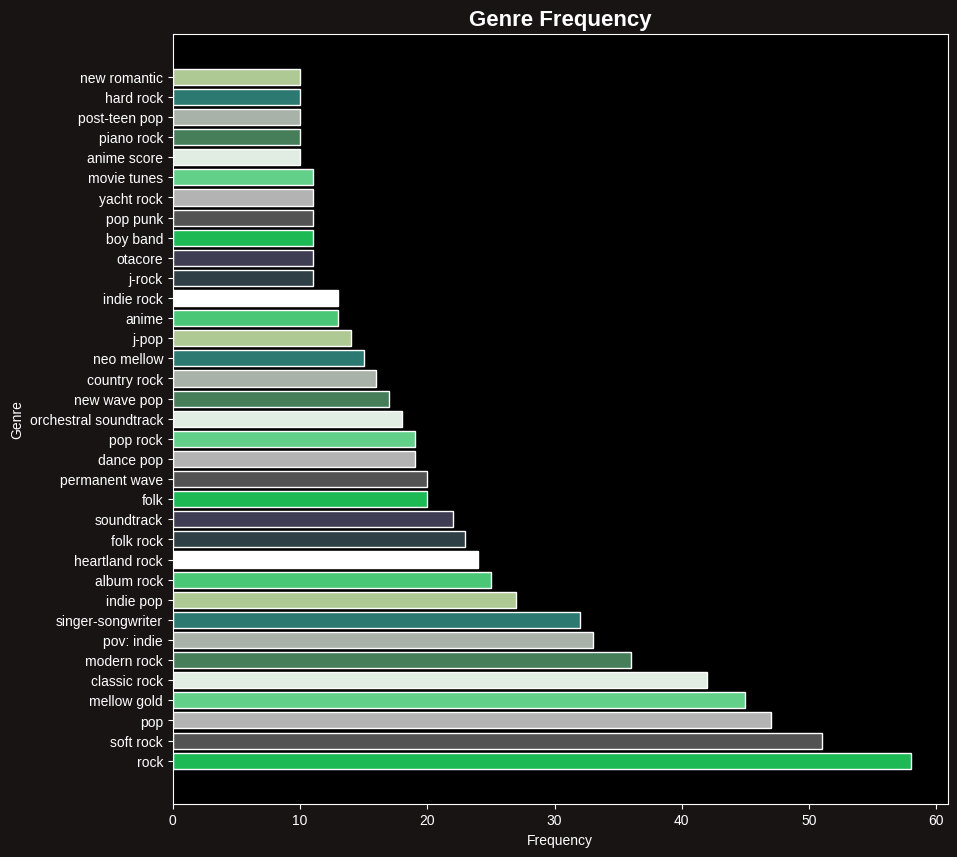

In [ ]:
createBarChartAlt(genresdf['Genre'], genresdf['Count'], 'Genre Frequency', 'Frequency', 'Genre', 'GenreFrequency')

#PowerPoint

##Default Initialisations

In [ ]:
# init presentation and colours
prs = Presentation()
font_colour_g = RGBColor(30, 215, 96)
font_colour_w = RGBColor(255, 255, 255)
background_colour = RGBColor(25, 20, 20)
left = top = width = height = Inches(0.5)

##Functions

In [ ]:
# default function to create a slide
def createSlide(prs, slide_type):
  # slide type- blank title, etc
  lyt=prs.slide_layouts[slide_type]
  # add to the pres
  slide=prs.slides.add_slide(lyt)
  # colour
  background = slide.background
  fill = background.fill
  fill.solid()
  fill.fore_color.rgb = background_colour
  # return the slide
  return slide

###Title Slide

In [ ]:
# title slide
def createTitleSlide(prs, title_text, subtitle_text):
  # create slide 0
  slide = createSlide(prs, 0)
  # add title and subtitle
  title=slide.shapes.title
  subtitle=slide.placeholders[1]
  # add title and subtitle text and their colour
  title.text=title_text
  title.text_frame.paragraphs[0].font.color.rgb = font_colour_g
  subtitle.text=subtitle_text
  subtitle.text_frame.paragraphs[0].font.color.rgb = font_colour_w

###Blank with Image

In [ ]:
# blank slide with image
def createImageSlide(prs, image):
  # blank slide 6
  slide = createSlide(prs, 6)
  # pos 0, 0 top left
  left = top = 0
  # img width and height based on slide
  slide_width = prs.slide_width
  slide_height = prs.slide_height

  # add image to the slide
  pic =slide.shapes.add_picture(image, left, top, slide_width, slide_height)

###Blank with Text

In [ ]:
# blank slide with text
def createTextSlide(prs, text_lines):
  # blank slide 6
  slide = createSlide(prs, 6)
  #start point 1 inch in from left and top
  left_inch = Inches(1)
  top_inch = Inches(1)
  # add a text box across length of slide
  text_box = slide.shapes.add_textbox(left_inch, top_inch, Inches(5), Inches(5))
  text_frame = text_box.text_frame

  # loop text list
  for i, line in enumerate(text_lines):
    # add text to paragraph run
    p = text_frame.add_paragraph()
    run = p.add_run()
    run.text = line
    # alternate colour based on index
    if i % 2 == 0:
      run.font.color.rgb = font_colour_w
    else:
      run.font.color.rgb = font_colour_g


###Image and Text

In [ ]:
# image and text slide
def createImageAndTextSlide(prs, image, text_lines):
  # blank slide 6
  slide = createSlide(prs, 6)
  # in 0.5 down 1.5 and pic of 4*4
  left_inch = Inches(0.5)
  top_inch = Inches(1.5)
  pic_width_inch = Inches(4)
  pic_height_inch = Inches(4)

  # add image
  picture = slide.shapes.add_picture(image, left_inch, top_inch, width=pic_width_inch, height=pic_height_inch)

  # add text box to side of image
  text_box = slide.shapes.add_textbox(left_inch + pic_width_inch + Inches(0.5), top_inch, width=Inches(5), height=pic_height_inch)
  text_frame = text_box.text_frame

  # loop text lines, adds to slide, colour based on index
  for i, line in enumerate(text_lines):
    p = text_frame.add_paragraph()
    run = p.add_run()
    run.text = line
    if i % 2 == 0:
      run.font.color.rgb = font_colour_w
    else:
      run.font.color.rgb = font_colour_g


##Slide Creation

In [ ]:
createTitleSlide(prs, f'Hey {name}, Welcome to your Spotify Wrapped', "Let's have a look at your all your Spotify data ever!!")

text_lines = [
    f'Some Listening stats for you first',
    f'\nA total of {total_streams} streams',
    f'\nOver a total of {df["ms_played"].sum()} milliseconds',
    f'\nWhich is the same as {total_playtime[6]} seconds and {total_playtime[7]} milliseconds',
    f'\nOr {total_playtime[4]} minutes and {total_playtime[5]} seconds',
    f'\nThat is {total_playtime[2]} hours and {total_playtime[3]} minutes',
    f'\nFor a total for {total_playtime[0]} days {total_playtime[1]} hours',
    f'\nYou had an average of {average_streams} streams a day',
    f'\nThe most streamed day was {most_streamed_day} which had {most_streamed_day_df.shape[0]} streams totalling {most_streams_time_mins[4]} minutes'
]

createTextSlide(prs, text_lines)
createTitleSlide(prs, "Next let's have a look at some metadata with each stream", "Skips, starts, ends, listening platform, country and timestamps")

In [ ]:
graph_list = ['SongSkipsPieChartUnknown.png', 'SongSkipsPieChart.png', 'ReasonSongEnded.png',
              'ReasonSongStarted.png', 'StreamsPerCountry.png', 'StreamsByDateScatter.png', 'StreamsByDateLine.png',
              'ListeningPlatform.png']

for i in graph_list:
  createImageSlide(prs, i)

createTitleSlide(prs, "While that information is interesting we know you want to see some real music stats!!", "Here you go your top tracks, track stats and genres")

graph_list = ['TrackStreams.png',
              'acousticnessofTopTracks.png', 'danceabilityofTopTracks.png', 'duration_msofTopTracks.png', 'energyofTopTracks.png',
              'instrumentalnessofTopTracks.png', 'keyofTopTracks.png', 'livenessofTopTracks.png',
              'loudnessofTopTracks.png', 'modeofTopTracks.png', 'speechinessofTopTracks.png', 'tempoofTopTracks.png',
              'time_signatureofTopTracks.png', 'valenceofTopTracks.png', 'GenreFrequency.png']

for i in graph_list:
  createImageSlide(prs, i)

In [ ]:
image='track_cover.png'
text_lines = [
    f"\nYour top track is {track_count.index[0]}",
    f"\nBy the wonderful {track_artist_name}",
    f"\nIt was released on the {track_release_date}",
    f"\nYou first streamed this track {track_first_listened}",
    f"\nAnd you have listened to it {track_count[0]} times"
]
createImageAndTextSlide(prs, image, text_lines)

createImageSlide(prs, 'AlbumStreams.png')
createTitleSlide(prs, f"Here's your top albums", f"I quite like {album_count.index[14]} myself")

image='album_cover.png'
text_lines = [
    f"\nYour top album is {album_count.index[0]}",
    f"\nBy the wonderful {album_artist_name}",
    f"\nIt has a total of {album_tracks} tracks",
    f"\nIt was released on the {album_release_date}",
    f"\nYou first listened to this album {album_first_listened}",
    f"\nAnd you've listened to the album {album_count[0]} times"
]
createImageAndTextSlide(prs, image, text_lines)

In [ ]:
createTitleSlide(prs, "Before we finish up let's have a look at your favourite artist", "Wonder who it will be?")
createImageSlide(prs, 'ArtistStreams.png')

image = 'artist_cover.png'
text_lines = [
    f"\nYour top artist is {artist_count.index[0]}",
    f"\nYou first listened to them on {album_first_listened}",
    f"\nWith a total of {artist_count[0]} streams",
    f"\nYour favourite songs from this artist include:",
    f"\n1. {artist_top_songs_0.index[0]}",
    f"\n2. {artist_top_songs_0.index[1]}",
    f"\n3. {artist_top_songs_0.index[2]}",
    f"\n4. {artist_top_songs_0.index[3]}",
    f"\n5. {artist_top_songs_0.index[4]}"
]
createImageAndTextSlide(prs, image, text_lines)

After adding all the information save the slide based on the name of the person the wrapped is being created for.

In [ ]:
prs.save(f"{name}SpotifyWrapped.pptx")